# Project Idea Summary:

## Background (Situation & Complication):

Bangkok is a popular city with its cultures & landmarks (need sources as evidence, e.g. Bangkok's rank in global tourism & Thailand tourism). With a lot of tourists yearly (need data), it is a good market for short to mid-term home rentals such as AirBnB. However, if you want to host an AirBnB in Bangkok, you might think that the city is already oversaturated with listings since the city has been a popular destination since a long time ago. You don't want to end up picking the wrong place and price for your rental, or worse yet, listing a rental that ended up with no customer in a whole year, which could lead to a huge loss since a house/apartment buildings are expensive.

## Objectives & Questions:

I want to help hosts (new & existing) understand the Bangkok AirBnB market to determine the most promising area to host a new rental and how to strategically price them using geospatial supply & demand analysis.

### Objectives

1. Find `"Hidden Gems"` neighbourhood in Bangkok to start a new listing and be the first-mover in the market
2. Uncover pricing patterns & hotspots to strategically set the right price for their new listing

### Questions

- Q1: Which neighbourhoods have a combination of **high guest demand** (indicated by number of reviews and high occupancy) but **low supply** (indicated by few active listings)?
- Q2: How do these `"Hidden Gems"` neighbourhoods compare (in price & availability (???)) to well known/popular neighbourhoods?
- Q3: How are AirBnB listing prices distributed geographically across Bangkok?
- Q4: Which neighbourhoods or geographic hotspots command premium prices, and how are they commonly characterised (e.g. centrality, proxitimity to popular landmarks)?
- Q5: Is there a correlation between price & demand?

### What Each Question Does

| Question | **Focus** | **Unit of Analysis** | **Main Insight** |
|---------|-----------|-----------------------|------------------|
| **Q1** | Identify Hidden Gems | Neighborhoods | High demand + low supply areas |
| **Q2** | Compare Hidden Gems vs Popular Areas | Neighborhoods (Gems vs Top Listings) | Hidden Gems are just as good or better (validation) |
| **Q3** | Price distribution across geography | *All listings* | How prices vary based on location |
| **Q4** | Identify high-price hotspots & their traits | Neighborhoods or map clusters | Where do premium listings concentrate |
| **Q5** | Correlation between price & demand | Listings (or neighborhoods) | Does high demand = high price? Or are some areas undervalued? |

## Possible Solutions:
1. Calculate demand indicators (compare number of reviews with occupancy)
2. Calculate supply indicators (check active listings count in each neighbourhood)
3. Identify hidden gems neighbourhoods: a combination of high demand (reviews), low availability (possible high occupancy), and low supply (few active listings)
4. Create a ranking/scoring system to evaluate neighbourhoods' _gem-ness_
5. Create a map showing gem-ness of each neighbourhood
------
6. Map price clusters across Bangkok to detect hotspots & coldspots (how, why?)
7. Calculate neighbourhood-level statistics for comparison (e.g. proximity to landmarks, average/median price)
8. Use statistics to get correlations of price with relevant features (e.g. reviews, proximity). Synthesize price & demand to detect undervalued high-demand neighborhoods (opportunity zones)

## Possible Actionable Recommendations:

- Target high-demand, low-competition areas for new listings (Hidden Gems). **Avoid oversaturated areas** with low demand growth or too many listings.
- Adjust pricing strategies based on:
    1. Proximity to pricing hotspots,
    2. Competitor pricing in similar neighborhoods,
    3. Demand intensity based on recent review trends,
    4. Correlation insights between price & demand.
- Consider premium pricing for listings in:
    1. Undersupplied hotspots,
    2. Locations with clear tourist appeal (near attractions or cultural areas),
    3. **Undervalued opportunity zones** (high demand, low price -> pricing catch-up likely).

## Possible Storytelling Flow (for presentation)
Target Audience: AirBnB hosts (both new & existing) who are new to the Bangkok market

1. Introduce the Airbnb market challenge
    - Location & pricing uncertainty in a competitive city.

2. Reveal the Hidden Gems
    - Highlight underrated areas with growing demand.

3. Uncover Pricing Patterns
    - Show visual insights on where and why prices spike.

4. Deliver Clear Recommendations
    - Help hosts and Airbnb identify opportunity zones & pricing strategies.

5. Conclude with Business Value

Business logic questions:
1. Is it okay to infer high occupancy despite the feature's uncertainty (availability_365)?
2. Can I add some external data for Bangkok landmarks? (Location of popular tourist landmarks in Bangkok for looking at proximity to AirBnB listings)
3. If I make a conclusion using a map visualization, do I still need to do inferential statistics to prove it?
4. I didn't remove any outliers for `number_of_reviews` since it indicates popular listings, but I removed outliers for `number_of_reviews_ltm` because it might give false information on the neihgbourhood's recent demand. For example, there might be 10 listings in an area, 1 is super popular/viral, while 9 had almost no reviews in the last 12 months. This suggests the area is not actually popular, but if I keep the outlier, our analysis/visualization will suggests that the area is in high demand. Is my logic correct?
5. I picked `number_of_reviews_ltm` & `availability_365` to calculate recent demand. Do they truly reflect occupancy patterns from a business perspective? Is there any flaw in it?
6. When I find the `Hidden Gems`, how do I confirm they are an actual neighbourhood/area trend rather than just 1-2 viral listings? Is there any known thresholds (e.g. minimum number of listings, minimum demand) for this?

Technical questions:
1. Is it correct if I choose to remove outliers using the 99th percentile method instead of the usual IQR? To avoid cutting outliers too aggressively and keep the distribution close to the real situation
2. Is it okay to remove outliers using our own measurement based on data/knowledge outside of statistics? For example, a tourist visa in Thailand usually have a maximum stay duration of 60 days, so any AirBnB with minimum nights of over 60 I consider as outliers (not relevant to the analysis)

Assumptions:
1. 29 December 2022 is the scraped date for the dataset
2. Reviews per month formula is unclear, so it's impossible to determine what the feature means (probably not going to be used)
3. `price` represents the price for 1 night, not the total price (price per night * minimum nights)

## What I've done so far:

Data Exploration:
1. Change 8 missing name into "No name"
2. Change 1 missing host name into "No name"
3. Dropped 1 data containing price == 0 & availability_365 == 0
4. Turned last_review data type into 'date'. The missing values here are meaningful, so we leave it as is. To help create the meaning, I created a new binary feature called has_review
5. reviews_per_month null values also have meaning similar to `last_review`, but instead of keeping them as NaN, I change them to 0
6. Created 2 new features: demand_score and demand_score_ltm to calculate the demand of each listing
7. Found 7 duplicates and removed them
8. Found many outliers for relevant numerical features


Outliers handling:
1. Remove price outliers using 99th percentile method to avoid cutting the price range too aggressively
2. Remove minimum nights with a fixed cutoff of 60, based on typical use of AirBnB and Thailand's tourist visa duration
3. Removed inactive listings (0 availability)
4. Didn't remove any outliers from number_of_reviews
5. Removed outliers from number_of_reviews_ltm with 99th percentile method

# Data Exploration

## Import libraries & dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./Airbnb Listings Bangkok.csv', index_col=0)
df.head(10)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0
5,1704776,NEw Pro!! Bungalow Bkk Centre,2129668,Wimonpak,Bang Kho laen,13.69757,100.52880,Entire home/apt,1000,250,19,2017-08-03,0.17,41,365,0
6,48736,Condo with Chaopraya River View,222005,Athitaya,Rat Burana,13.68556,100.49535,Private room,1558,3,1,2014-02-03,0.01,1,365,0
7,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.82925,100.56737,Entire home/apt,1461,1,0,NaN,NaN,1,365,0
8,1744248,"Batcave, Pool view, near Chatuchak",9181769,Nol,Chatu Chak,13.81693,100.56433,Entire home/apt,1558,3,10,2016-03-29,0.09,1,365,0
9,952677,Standard Room Decor do Hostel,5171292,Somsak,Khlong San,13.72040,100.50757,Private room,700,2,4,2019-12-27,0.03,10,87,0


## Check for data types & missing values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15854 non-null  int64  
 1   name                            15846 non-null  object 
 2   host_id                         15854 non-null  int64  
 3   host_name                       15853 non-null  object 
 4   neighbourhood                   15854 non-null  object 
 5   latitude                        15854 non-null  float64
 6   longitude                       15854 non-null  float64
 7   room_type                       15854 non-null  object 
 8   price                           15854 non-null  int64  
 9   minimum_nights                  15854 non-null  int64  
 10  number_of_reviews               15854 non-null  int64  
 11  last_review                     10064 non-null  object 
 12  reviews_per_month               10064

Data type for every columns looks right, but there are some missing values

In [4]:
df.isna().sum()

id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

Missing data:

name = 8

host_name = 1

last_review = 5790

reviews_per_month = 5790

In [5]:
df.duplicated().sum()

0

No duplicates found

In [6]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


Quick look:
1. Price distribution is heavily right skewed
2. There are extreme outliers in minimum_nights, where the max is 1125 leading to a mean of 15 (even though the median is 1)
3. There are extreme outliers in number_of_reviews, where the max is 1224 leading to a mean of 16 (even though the median is 2)
4. reviews_per_month & calculated_host_listings_count seems to have the same right-skew case as the variables above
5. availability_365 seems to be left-skewed (the only one with a left skew since a higher number is more common for this variable)
6. number_of_reviews_ltm seems to be right-skewed, with a mean of 3.5 and median of 0. This indicates that at least half of listings had no review in the last 12 months, perhaps telling us that most listings in Bangkok is not going well

### Summary

**Basic Dataset Info**

Total rows (listings): 15,854

Total columns: 17

---

**Data Quality Issues Detected**

| Column | Issue |
|---|---|
| `name`            | 8 missing values; minor issue, can fill with "No name" or drop rows |
| `last_review`     | 5,790 missing values; Indicates not all listings are reviewed |
| `reviews_per_month` | Same as above, missing for listings with no reviews |
| `price`           | Some listings have price = 0; may need to filter/remove |
| `minimum_nights`  | Max value is 1125, possible outliers |

Some values also might be invalid/incompatible for a few variables, needs further checking.

# Detailed Check & Handling Basic Data Quality Issues

Check each features data characteristics & fill missing values

## ID

In [7]:
df['id'].nunique()

15854

All id is unique, no problem here

## Host ID

In [8]:
df['host_id'].nunique()

6659

Out of 15854 listings, there are only 6659 unique host id, that means there are multiple hosts with more than 1 listing on airBnB Bangkok

In [9]:
df['host_id'].value_counts()

host_id
201677068    228
52161947      99
26736483      89
68154488      62
228535635     62
            ... 
81226089       1
98554658       1
32884023       1
164391680      1
94899359       1
Name: count, Length: 6659, dtype: int64

From the top of the list, I can see hosts with extreme number of listings

In [10]:
# Get host_ids that appear more than once
hosts_with_multiple_listings = df['host_id'].value_counts()
hosts_with_multiple_listings = hosts_with_multiple_listings[hosts_with_multiple_listings > 1]
# Count how many hosts have multiple listings
hosts_with_multiple_listings.count()

2053

Out of 6659 unique hosts, 2053 of them have more than 1 listing

In [11]:
hosts_with_multiple_listings.describe()

count    2053.000000
mean        5.478811
std         8.662345
min         2.000000
25%         2.000000
50%         3.000000
75%         5.000000
max       228.000000
Name: count, dtype: float64

Most of these 2053 hosts with multiple listings only have 2-5 listings on AirBnB Bangkok, which are probably individuals with multiple properties in the city. However, I can see that the max is 228 and I have seen several hosts with > 50 listings. They might be big players in the Bangkok real estate industry, and I need further checking on them and decide if I want to remove them as outliers

## Listing Name

I have seen that there are 8 missing data in the `name` column, so I need to check what's the issue leading to the missing name

In [12]:
df[df['name'].isna()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
439,4549768,NaN,18852579,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,NaN,NaN,1,365,0
544,4720818,NaN,24386225,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,NaN,NaN,1,365,0
572,4245018,NaN,22030043,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,NaN,NaN,1,365,0
669,6148415,NaN,31895202,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,2,0,NaN,NaN,1,365,0
1030,8055144,NaN,42521288,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,NaN,NaN,1,365,0
1282,10000742,NaN,51374914,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,2017-05-13,0.07,1,365,0
1594,10710165,NaN,55347997,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,NaN,NaN,1,365,0
2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


As far as I know, AirBnB does not allow a blank name for a listing. So, this is probably either a data input or data extraction error that happened in the process of making this dataset.

Since the data is actually complete except for the listing name, and listing name does not affect our analysis, I have decided to keep the rows and change the value to "No name" instead of deleting them.

In [13]:
# Option 1: Assign the result back to the dataframe column
df['name'] = df['name'].fillna('No name')

# Then check the rows that had NaN values
df[df.index.isin((439,544,572,669,1030,1282,1594,2075))]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
439,4549768,No name,18852579,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,NaN,NaN,1,365,0
544,4720818,No name,24386225,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,NaN,NaN,1,365,0
572,4245018,No name,22030043,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,NaN,NaN,1,365,0
669,6148415,No name,31895202,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,2,0,NaN,NaN,1,365,0
1030,8055144,No name,42521288,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,NaN,NaN,1,365,0
1282,10000742,No name,51374914,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,2017-05-13,0.07,1,365,0
1594,10710165,No name,55347997,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,NaN,NaN,1,365,0
2075,13142743,No name,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


All missing listing names have now been replaced with "No name"

## Host Name

Host name represents the name of the host. I saw that there is 1 missing data on the column. From looking at the CSV file, there are also concerns with the values of the host name that needs checking. For example, there are host names that uses Thai character, which is different than the standard latin characters.

In [14]:
df[df['host_name'].isna()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3571,19682464,Cozy Hideaway,137488762,NaN,Bang Kapi,13.76999,100.63769,Private room,1399,3,1,2017-07-29,0.02,1,365,0


In [15]:
df[df['host_id'] == 137488762]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3571,19682464,Cozy Hideaway,137488762,NaN,Bang Kapi,13.76999,100.63769,Private room,1399,3,1,2017-07-29,0.02,1,365,0


Looking at the data, this listing has complete data, only the host name is missing. For our analysis, host name is not that important, especially since I have `host_id` that I can use to distinguish hosts instead of using their name. So, I will fill the missing name with "No name" instead of removing it.

In [16]:
df['host_name'] = df['host_name'].fillna('No name')
df[df.index == 3571]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3571,19682464,Cozy Hideaway,137488762,No name,Bang Kapi,13.76999,100.63769,Private room,1399,3,1,2017-07-29,0.02,1,365,0


In [17]:
import re

df_non_latin = df[df['host_name'].str.contains(r'[^\x00-\x7F]+', na=False)]
df_non_latin

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
29,973830,BangLuang House1 @ Bangkok Thailand,5325919,วสวัตติ์,Bangkok Yai,13.732920,100.464130,Private room,2078,1,76,2019-12-31,0.64,3,350,0
43,988373,BangLuang House 2@ Bangkok Thailand,5325919,วสวัตติ์,Phasi Charoen,13.731220,100.462280,Entire home/apt,1795,1,95,2022-12-15,0.80,3,339,10
330,4313485,Downtown Condo 2 mins from BTS,22392397,Gün,Vadhana,13.718050,100.590010,Private room,4429,3,0,NaN,NaN,1,365,0
415,3209677,Crystal View Apartment,16262162,สมพจน์,Pra Wet,13.704890,100.669690,Private room,699,2,0,NaN,NaN,3,180,0
417,3209940,คริสตัลวิว อพาร์ทเมนท์,16262162,สมพจน์,Pra Wet,13.706750,100.670850,Private room,699,1,0,NaN,NaN,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15732,788244134489285222,21-one9five-大一室一厅无边泳池健身房火车夜市尚泰购物中心可包月,479841137,季,Huai Khwang,13.755805,100.569304,Entire home/apt,1200,1,0,NaN,NaN,21,331,0
15740,786092125253016572,18-RAMA9一室一厅无边泳池健身房火车夜市尚泰包月,479841137,季,Ratchathewi,13.754457,100.562863,Entire home/apt,1114,15,0,NaN,NaN,21,304,0
15742,786168532427557756,The TempoGrand,478511765,ฐิติรัตน์,Chom Thong,13.712921,100.468461,Private room,1200,1,0,NaN,NaN,1,364,0
15763,786815164457608652,曼谷步行兩分鐘到達BTS onnut 的舒適公寓,128703025,韫如,Phra Khanong,13.704755,100.602092,Private room,1200,1,0,NaN,NaN,1,361,0


It seems like 579 listings contain at least 1 non-Latin characters. But since they are all readable by the code, and they are not an important feature, I can leave it as is for now.

## Neighbourhood

In [18]:
df['neighbourhood'].head(10)

0      Ratchathewi
1          Bang Na
2        Bang Kapi
3        Din Daeng
4        Bang Kapi
5    Bang Kho laen
6       Rat Burana
7       Chatu Chak
8       Chatu Chak
9       Khlong San
Name: neighbourhood, dtype: object

In [19]:
df_neighbourhood_non_latin = df[df['neighbourhood'].str.contains(r'[^\x00-\x7F]+', na=False)]
df_neighbourhood_non_latin

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm


In [20]:
df['neighbourhood'].value_counts()

neighbourhood
Vadhana                 2153
Khlong Toei             2097
Huai Khwang             1125
Ratchathewi             1114
Bang Rak                 827
Sathon                   809
Phra Nakhon              619
Phra Khanong             558
Chatu Chak               548
Bang Na                  458
Parthum Wan              455
Din Daeng                444
Phaya Thai               422
Suanluang                382
Khlong San               357
Bang Kapi                260
Bang Sue                 250
Bang Phlat               217
Yan na wa                200
Thon buri                182
Don Mueang               167
Pra Wet                  156
Phasi Charoen            155
Bangkok Noi              152
Lat Krabang              149
Bang Kho laen            140
Lak Si                   126
Pom Prap Sattru Phai     123
Bang Khen                116
Samphanthawong           114
Wang Thong Lang          100
Bang Khae                 92
Dusit                     91
Bangkok Yai               90


In [21]:
df['neighbourhood'].nunique()

50

Neighbourhood data looks fine and there are 50 different neighbourhoods in the Bangkok data

## Latitude

In [22]:
print(df['latitude'].min())
print(df['latitude'].max())
print(f"Range of latitude: {df['latitude'].max() - df['latitude'].min()}")

13.5273
13.95354
Range of latitude: 0.42623999999999995


## Longitude

In [23]:
print(df['longitude'].min())
print(df['longitude'].max())
print(f"Range of longitude: {df['longitude'].max() - df['longitude'].min()}")

100.32955
100.92344
Range of longitude: 0.5938900000000018


## Room Type

In [24]:
df['room_type'].value_counts()

room_type
Entire home/apt    8912
Private room       5770
Hotel room          649
Shared room         523
Name: count, dtype: int64

There are 4 different room types, with 'Entire home/apt' and 'Private room' being the most common. 'Hotel room' and 'Shared room' both have < 1000 listings

## Price

In [25]:
df['price'].describe().astype(int)

count      15854
mean        3217
std        24972
min            0
25%          900
50%         1429
75%         2429
max      1100000
Name: price, dtype: int32

There are a couple of obvious problems with `price`:
1. There are listings with 0 as the price, which shouldn't be possible
2. There are extreme outliers that stretches the distribution to be heavily right-skewed

In this section, I are only handling the basic data quality issue (number 1). I'll handle distribution & outliers issue on the next section

In [26]:
df[df['price'] == 0]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
11103,44563108,Somerset Maison Asoke Bangkok,360620448,Somerset Maison Asoke,Vadhana,13.73815,100.5642,Hotel room,0,1,0,NaN,NaN,1,0,0


Apparently, there's only 1 listing with a price of 0. This listing is quite weird since it's also never available (`availability_365` is 0, indicating it's not available for any customer). This is either a data input error or there's another feature outside of this dataset that could have explained this data (e.g. Maybe this listing has been banned by AirBnB, but is mistakenly left in the database)

Therefore, my final verdict is to remove this data since it's not useful to our analysis

In [27]:
df = df.drop(index=11103)

In [28]:
df[df.index.isin([11102, 11103, 11104])]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
11102,44562807,New! La Chada Night Market Studio 2PPL near MRT,201677068,Curry,Huai Khwang,13.77317,100.57911,Entire home/apt,1057,1,2,2020-09-11,0.07,228,0,0
11104,44563365,New! La Chada Night Market Studio 2PPL near MRT,201677068,Curry,Thung khru,13.65716,100.50088,Entire home/apt,1057,1,0,NaN,NaN,228,0,0


In [29]:
df['price'].describe().astype(int)

count      15853
mean        3217
std        24972
min          278
25%          900
50%         1429
75%         2429
max      1100000
Name: price, dtype: int32

In [30]:
print(f"Current price range before outliers removal: {df['price'].min()} - {df['price'].max()}")

Current price range before outliers removal: 278 - 1100000


## Minimum Nights

In [31]:
df['minimum_nights'].describe()

count    15853.000000
mean        15.293257
std         50.816496
min          1.000000
25%          1.000000
50%          1.000000
75%          7.000000
max       1125.000000
Name: minimum_nights, dtype: float64

The only problem here is the extreme outliers

In [32]:
df[df['minimum_nights'] > 30]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
5,1704776,NEw Pro!! Bungalow Bkk Centre,2129668,Wimonpak,Bang Kho laen,13.697570,100.528800,Entire home/apt,1000,250,19,2017-08-03,0.17,41,365,0
23,1808600,Contemporary Modern Duplex-Thong Lo,9478184,Shine,Khlong Toei,13.720970,100.578230,Entire home/apt,2078,60,83,2018-09-12,0.75,1,55,0
38,1842066,ICONSIAM River view on 49th floor,9626074,Weera,Bang Rak,13.722870,100.516780,Private room,2500,180,15,2015-12-08,0.14,1,88,0
39,169514,2br apt in Sukhumvit Asoke near BTS,729617,Kanchuya,Vadhana,13.744640,100.557840,Entire home/apt,1732,90,0,NaN,NaN,1,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15655,787580096612257949,LIFE拉玛九HYPE天空泳池CBD35平大一居,270215556,Ideomobi,Ratchathewi,13.753760,100.562272,Entire home/apt,800,60,0,NaN,NaN,28,365,0
15670,783793175027130306,Spectacular Panorama view condo,295164261,Farsai,Khlong Toei,13.728487,100.565456,Entire home/apt,2076,80,0,NaN,NaN,3,173,0
15686,784311306695823680,Luxury one bedroom Silom,479640508,Yoyo,Bang Rak,13.727640,100.524220,Entire home/apt,3200,180,0,NaN,NaN,10,365,0
15695,785232852636103149,The Aree condo near BTS Ari,491978643,Natcha,Phaya Thai,13.781758,100.540628,Entire home/apt,2000,180,0,NaN,NaN,1,363,0


In [33]:
df[df['minimum_nights'] > 1000]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
61,1041976,Long-stay special rate spacious entire floor Siam,5735895,Pariya,Parthum Wan,13.74814,100.52016,Entire home/apt,2900,1125,295,2021-08-21,2.61,3,0,0
7986,35165443,Wonderful apartment for you holiday in Thai,86991723,Yang,Bang Na,13.67260,100.60352,Entire home/apt,2000,1115,0,NaN,NaN,2,358,0
11524,49032568,Freehold Condo near Bangsue Grand Station,4661237,Chayanid,Bang Sue,13.80697,100.52362,Entire home/apt,554,1095,0,NaN,NaN,1,358,0


## Number of Reviews

In [34]:
df['number_of_reviews'].describe()

count    15853.000000
mean        16.655207
std         40.614397
min          0.000000
25%          0.000000
50%          2.000000
75%         13.000000
max       1224.000000
Name: number_of_reviews, dtype: float64

## Last Review & Reviews per Month

Both of these variables are connected since if there's no `last_review`, the `reviews_per_month` is automatically 0 (but it's NaN in the dataset)

In [35]:
df[['last_review', 'reviews_per_month']].isna().sum()

last_review          5789
reviews_per_month    5789
dtype: int64

In [36]:
missing_percentages = df[['last_review', 'reviews_per_month']].isna().mean() * 100
print(missing_percentages)

last_review          36.516748
reviews_per_month    36.516748
dtype: float64


The biggest problem with both variables are 36.5% of their data are missing, which is quite big

In [37]:
df[df['reviews_per_month'] == 0]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm


There are no value 0 on reviews_per_month, so the null value is likely intentional

To handle them:
1. Turn `last_review` into `date` data type, and let the null value stay as they are meaningful (I can't replace them). To give meaning to the null value, I will create a new binary feature called `has_review`
2. Turn null value in `reviews_per_month` into 0

In [38]:
# Convert 'last_review' to datetime (missing values will become NaT automatically)
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

In [39]:
# Preview the result
df[['last_review']].head()

,last_review
0,2020-01-06
1,NaT
2,NaT
3,2022-04-01
4,NaT


In [40]:
# Check the data type of 'last_review' column
print(df['last_review'].dtypes)

datetime64[ns]


In [41]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

In [42]:
df[['reviews_per_month']].head()

,reviews_per_month
0,0.50
1,0.00
2,0.00
3,0.03
4,0.00


In [43]:
# Check the data type of 'reviews_per_month' column
print(df['reviews_per_month'].dtypes)

float64


In [44]:
df[['last_review', 'reviews_per_month']].isna().sum()

last_review          5789
reviews_per_month       0
dtype: int64

Now, `reviews_per_month` has no NaN value, and the NaT value in `last_review` is left intentionally

In [45]:
df['has_review'] = df['number_of_reviews'] > 0
df.head(10)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,has_review
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0,True
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaT,0.00,2,358,0,False
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaT,0.00,1,365,0,False
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1,True
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaT,0.00,3,365,0,False
5,1704776,NEw Pro!! Bungalow Bkk Centre,2129668,Wimonpak,Bang Kho laen,13.69757,100.52880,Entire home/apt,1000,250,19,2017-08-03,0.17,41,365,0,True
6,48736,Condo with Chaopraya River View,222005,Athitaya,Rat Burana,13.68556,100.49535,Private room,1558,3,1,2014-02-03,0.01,1,365,0,True
7,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.82925,100.56737,Entire home/apt,1461,1,0,NaT,0.00,1,365,0,False
8,1744248,"Batcave, Pool view, near Chatuchak",9181769,Nol,Chatu Chak,13.81693,100.56433,Entire home/apt,1558,3,10,2016-03-29,0.09,1,365,0,True
9,952677,Standard Room Decor do Hostel,5171292,Somsak,Khlong San,13.72040,100.50757,Private room,700,2,4,2019-12-27,0.03,10,87,0,True


In [46]:
# Count listings with and without reviews
print(df["has_review"].value_counts())

# Percentage of listings with at least one review
percent_with_reviews = df["has_review"].mean() * 100
print(f"{percent_with_reviews:.2f}% of listings have at least one review.")

has_review
True     10064
False     5789
Name: count, dtype: int64
63.48% of listings have at least one review.


## Calculated Host Listings Count

Official Definition:
The number of listings a host owns in the same city/region at the time of the data scrape.

In simpler terms:
If a host manages multiple listings in Bangkok, then for each of their listings, this column will show the total number of listings they have in the dataset.

In [47]:
df[['host_id', 'name', 'calculated_host_listings_count']].head()

,host_id,name,calculated_host_listings_count
0,120437,Nice room with superb city view,2
1,120541,"Easy going landlord,easy place",2
2,123784,modern-style apartment in Bangkok,1
3,153730,Spacious one bedroom at The Kris Condo Bldg. 3,1
4,610315,Suite Room 3 at MetroPoint,3


For example, host_id 120437 has 2 `calculated_host_listings_count`. That means that particular host has 2 listings in this dataset. This is useful to tell the type of the hosts (whether it's likely an individual or a big company)

In [48]:
df[df['host_id'] == 120437]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,has_review
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0,True
390,3053245,Lovely apartment in Trendy Ari area,120437,Nuttee,Phaya Thai,13.78898,100.54582,Entire home/apt,1905,3,33,2020-01-03,0.33,2,330,0,True


## Availability 365

This column reflects the number of days in the future (from the date the data was scraped) that a listing is **available to be booked** on the Airbnb calendar.

> 📌 **Important:**  
> This column does **not** show how often the listing was booked in the past.  
> A listing may be unavailable because:
> - The host manually blocked those dates  
> - The dates were already booked by guests  
> - The listing is inactive or paused  

How to Interpret It (When Combined with Reviews)

By itself, `availability_365` only tells us how much the host **made the listing available**, not how much it was booked.

However, when paired with **`number_of_reviews_ltm`**, I can infer demand and possible occupancy patterns:

| Scenario | Interpretation |
|----------|----------------|
| **High availability + Low reviews** | Listing is open but not being booked → **Low demand** |
| **Low availability + High reviews** | Listing was often booked → **High occupancy or strong demand** |
| **Zero availability** | Listing may be paused, hidden, or fully booked — not available for the next year |

Usage in Project
I will combine `availability_365` with review data to:
- Calculate a **proxy for recent occupancy** (`demand_score_ltm = reviews_ltm / availability_365`)
- Identify listings with **strong demand signals** despite limited calendar availability
- Detect **active vs inactive listings** when preparing the dataset for demand analysis

In [49]:
df['availability_365'].describe()

count    15853.000000
mean       244.394058
std        125.832224
min          0.000000
25%        138.000000
50%        309.000000
75%        360.000000
max        365.000000
Name: availability_365, dtype: float64

When paired with `number_of_reviews` & `number_of_reviews_ltm`, I can infer the demand of the listings in each area of Bangkok, making them very useful for our analysis later.

## Number of Reviews on the Last 12 Months

This column shows the number of guest reviews a listing has received in the **past 12 months**, making it one of the most reliable proxies for **recent guest demand**.

Why It's Important:
1. Reflects **recent booking activity** more accurately than total reviews.
2. Helps detect **emerging demand** in neighborhoods that may be under the radar.
3. Critical for identifying **"Hidden Gems"** with growing popularity.

- **High `reviews_ltm`** = Recent guest activity → strong **demand**
- **Low `reviews_ltm`** = Weak or no guest interest in the past year

Since `availability_365` represents **future availability** (not how often it was booked), combining it with recent review count allows us to infer meaningful **demand signals**:

Demand Score Formula (Proxy for Demand Intensity):

```python
df["demand_score_ltm"] = df["number_of_reviews_ltm"] / (df["availability_365"] + 1)  # +1 to avoid division by zero
```

This ratio helps highlight listings that are getting many reviews **despite** limited calendar availability → an important signal of **hot properties**.

In [50]:
df['number_of_reviews_ltm'].describe()

count    15853.000000
mean         3.481738
std          8.917176
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max        325.000000
Name: number_of_reviews_ltm, dtype: float64

# Data Distributions & Outliers Handling

## Identify & handle duplicates

In [51]:
df.duplicated().sum()

0

In [52]:
df_deduplicated = df.copy()
df_deduplicated = df_deduplicated.drop(columns=['id'])
df_deduplicated

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,has_review
0,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0,True
1,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaT,0.00,2,358,0,False
2,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaT,0.00,1,365,0,False
3,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1,True
4,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaT,0.00,3,365,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaT,0.00,1,362,0,False
15850,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaT,0.00,14,365,0,False
15851,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaT,0.00,14,365,0,False
15852,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaT,0.00,14,365,0,False


In [53]:
df_deduplicated.duplicated().sum()

7

In [54]:
df_deduplicated[df_deduplicated.duplicated(keep=False)]

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,has_review
5890,NA BANGLAMPOO GUEST HOUSE,87704107,Yui,Phra Nakhon,13.762790,100.497900,Private room,1400,1,0,NaT,0.0,9,361,0,False
5976,NA BANGLAMPOO GUEST HOUSE,87704107,Yui,Phra Nakhon,13.762790,100.497900,Private room,1400,1,0,NaT,0.0,9,361,0,False
8789,small1,97598307,Soo,Don Mueang,13.920720,100.575780,Shared room,350,1,0,NaT,0.0,4,180,0,False
8790,small1,97598307,Soo,Don Mueang,13.920720,100.575780,Shared room,350,1,0,NaT,0.0,4,180,0,False
15183,Sathon Luxury 2 br/China Town/Icon Siam,264864968,Tricia,Sathon,13.710777,100.519891,Entire home/apt,2221,1,0,NaT,0.0,44,340,0,False
15186,Sathon Luxury 2 br/China Town/Icon Siam,264864968,Tricia,Sathon,13.710777,100.519891,Entire home/apt,2221,1,0,NaT,0.0,44,340,0,False
15190,Sathon Luxury 2 br/China Town/Icon Siam,344327171,Alice,Sathon,13.710777,100.519891,Entire home/apt,2221,1,0,NaT,0.0,40,340,0,False
15191,Sathon Luxury 2 br/China Town/Icon Siam,344327171,Alice,Sathon,13.710777,100.519891,Entire home/apt,2221,1,0,NaT,0.0,40,340,0,False
15549,Luxury 1 Bed/Central Rama9/Jodds Fair/Phra ram9,20133201,Willam,Huai Khwang,13.756184,100.568269,Entire home/apt,2533,3,0,NaT,0.0,33,360,0,False
15550,Luxury 1 Bed/Central Rama9/Jodds Fair/Phra ram9,20133201,Willam,Huai Khwang,13.756184,100.568269,Entire home/apt,2533,3,0,NaT,0.0,33,360,0,False


In [55]:
df_deduplicated.drop_duplicates(inplace=True)
df_deduplicated.duplicated().sum()

0

In [56]:
df_deduplicated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15846 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   name                            15846 non-null  object        
 1   host_id                         15846 non-null  int64         
 2   host_name                       15846 non-null  object        
 3   neighbourhood                   15846 non-null  object        
 4   latitude                        15846 non-null  float64       
 5   longitude                       15846 non-null  float64       
 6   room_type                       15846 non-null  object        
 7   price                           15846 non-null  int64         
 8   minimum_nights                  15846 non-null  int64         
 9   number_of_reviews               15846 non-null  int64         
 10  last_review                     10064 non-null  datetime64[ns]
 11  reviews

You're right in identifying these nuanced cases, which are common pitfalls in Airbnb data analysis. Let's first clarify the existing cases you've identified clearly:

**Your detected edge cases:**

1. **Same host, same building, different listings** (variations such as different rooms or facilities).
2. **Same host, same building, but different listing names**.
3. **Same exact listing, different hosts** (duplicate listing, multiple accounts).

4. **Potential undetected:** All listing details are identical, but different number of reviews or different reviews (could indicate old-new listing transition, data scrapes at different times, or listing reposting).

---

## Other Possible Edge Cases to Consider:

**5. Temporary Listing Changes:**  
- Listings that were temporarily delisted and reposted with a new ID, causing duplicate data but different timestamps.

**6. Listings Managed by Agencies or Co-hosts:**  
- Different hosts but same property managed under agency management, leading to identical or near-identical listings.

**7. Same listing reposted after inactivity:**  
- Host reposting same listing after being inactive (reviews reset to 0, new listing ID, rest identical).

**8. Host-switching scenarios:**  
- Property switches host mid-way due to ownership or management changes, causing duplicate listings with subtle differences (e.g., description slightly updated, reviews reset).

---

## How to Handle These Edge Cases:

Given these complex scenarios, here's a practical strategy:

### **Step 1: Clearly Define Your Unique Identifier Criteria**
Choose criteria that, when combined, uniquely identify a listing:

- **Address/Location coordinates**
- **Host ID**
- **Number of rooms/beds**
- **Listing Name**
- **Listing Description**
- **Amenities**
- **Price**

Typically, a combination of **location coordinates + host_id + room specifics** is sufficient. For problematic cases, you'll need deeper rules.

### **Step 2: Categorize & Decide**
Group potential duplicates using a hierarchy:

- **Primary Identifier (Exact Matches):** Coordinates or addresses.
- **Secondary Identifier (Moderate Variations):** Host ID, Listing Name, Rooms.
- **Tertiary Identifier (Confirmatory):** Amenities, Price, Photos (if available).

Create a logical hierarchy:
- If **coordinates/address + host + rooms** match, these are likely genuine duplicates or legitimate variants (Case 1 or 2).
- If **coordinates/address + rooms** match but hosts differ, flag for deeper review (possible Case 3 or Case 6).
- If everything is identical but reviews differ, it's possibly a reposted listing (Case 4 or 7).

### **Step 3: Action Guidelines**
- **Legitimate variations (case 1 & 2):** Keep as separate listings. Clearly document this scenario in analysis.
- **Exact duplicates (case 3):** Investigate further or remove duplicates, keeping the most recent or highest reviewed listing.
- **Reposted Listings (case 4 & 7):** Consider aggregating reviews or keeping the newest listing only. Note this clearly.
- **Agency-managed duplicates (case 6 & 8):** Consolidate these if agency data is relevant or note clearly if left separate.

---

## Recommended Best Practice:
**Create a "duplicates log"**  
- Clearly document each suspected duplicate and your decision:
  - Listing IDs involved
  - Reason for duplication
  - Action taken (kept, merged, removed, or flagged for future attention)

This transparency will bolster the reliability and robustness of your project.

---

## Suggested Next Steps for You:
- Run a **group-by** analysis (location, host, rooms) to flag potential duplicates.
- Investigate flagged groups manually for deeper clarification.
- Create explicit handling rules for each edge-case category.
- Document all actions taken clearly in your cleaning notebook or a separate CSV.

Would you like help writing code snippets or queries to efficiently identify these cases?

In [57]:
df_deduplicated.head(2)

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,has_review
0,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.5,2,353,0,True
1,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaT,0.0,2,358,0,False


Problem here: listing name is not standardized, could have exact same

In [58]:
no_dupe_cols = ['host_name', 'calculated_host_listings_count', 'has_review']
df_deduplicated.drop(columns=no_dupe_cols).head(2)

,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365,number_of_reviews_ltm
0,Nice room with superb city view,120437,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.5,353,0
1,"Easy going landlord,easy place",120541,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaT,0.0,358,0


There could be a case where a listing name is different in capitalization, even though it's still the exact same listing (perhaps reposted or posted more than 1 times to 'cheat' the algorithm). Example:
1. Nice room with great view!
2. Nice Room with Great View!

Both will not be detected as a duplicate if don't standardize them

In [59]:
df_deduplicated['name_standardized'] = df_deduplicated['name'].str.lower().str.strip()
df_deduplicated.drop(columns=no_dupe_cols).head(2)

,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365,number_of_reviews_ltm,name_standardized
0,Nice room with superb city view,120437,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.5,353,0,nice room with superb city view
1,"Easy going landlord,easy place",120541,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaT,0.0,358,0,"easy going landlord,easy place"


In [60]:
df_deduplicated.drop(columns=no_dupe_cols).duplicated().sum()

0

There are a few tricky edge cases

1. Different listings name, but it's hosted by the same host with the exact same location (lat & long)

In [61]:
df_deduplicated.drop(columns=no_dupe_cols).drop(columns=['name', 'name_standardized']).duplicated().sum()

17

In [62]:
df_deduplicated[df_deduplicated.drop(columns=no_dupe_cols).drop(columns=['name', 'name_standardized']).duplicated(keep=False)]

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,has_review,name_standardized
4725,"Sukhumvit, Emporium Mall, Phrompong BTS Station",163815743,Chatchawan,Khlong Toei,13.730760,100.568770,Private room,12629,1,0,NaT,0.0,10,351,0,False,"sukhumvit, emporium mall, phrompong bts station"
4726,"Deluxe,WiFi,EmQuatier,1min to Phrompong BTS",163815743,Chatchawan,Khlong Toei,13.730760,100.568770,Private room,12629,1,0,NaT,0.0,10,351,0,False,"deluxe,wifi,emquatier,1min to phrompong bts"
4729,"Near Phrompong BTS,Benjasiri Park,WiFi",163815743,Chatchawan,Khlong Toei,13.730760,100.568770,Private room,12629,1,0,NaT,0.0,10,351,0,False,"near phrompong bts,benjasiri park,wifi"
7462,Hostel (8-Bed Mixed Dorm/wifi/Breakfast/Ratchada),253587319,Sukanya,Din Daeng,13.786360,100.570200,Shared room,350,1,0,NaT,0.0,10,364,0,False,hostel (8-bed mixed dorm/wifi/breakfast/ratchada)
7463,Hostel (4-Bed Mixed Dorm/wifi/breakfast/Ratchada),253587319,Sukanya,Din Daeng,13.786360,100.570200,Shared room,350,1,0,NaT,0.0,10,364,0,False,hostel (4-bed mixed dorm/wifi/breakfast/ratchada)
8093,"Stay Monomer, the ideal location (12 Female) 04",56782854,Off,Ratchathewi,13.752840,100.531240,Shared room,400,1,0,NaT,0.0,24,242,0,False,"stay monomer, the ideal location (12 female) 04"
8095,"Stay Monomer, the ideal location (12 Female) 06",56782854,Off,Ratchathewi,13.752840,100.531240,Shared room,400,1,0,NaT,0.0,24,242,0,False,"stay monomer, the ideal location (12 female) 06"
8104,"Stay Monomer, the ideal location (12 Mixed) 05",56782854,Off,Ratchathewi,13.752840,100.531240,Shared room,400,1,0,NaT,0.0,24,242,0,False,"stay monomer, the ideal location (12 mixed) 05"
8105,"Stay Monomer, the ideal location (12 Mixed) 06",56782854,Off,Ratchathewi,13.752840,100.531240,Shared room,400,1,0,NaT,0.0,24,242,0,False,"stay monomer, the ideal location (12 mixed) 06"
8683,Oriental Charm Double Bed,285546572,Riverview,Samphanthawong,13.734300,100.511860,Entire home/apt,2758,1,0,NaT,0.0,21,63,0,False,oriental charm double bed


After looking at the duplicated data, it seems like there are multiple variants of the same building. Now this might happen due to high-rise buildings. For example, someone like host with id 285546572 might own multiple apartment units in the same building with 20 floors. This would mean that even though there are multiple listings with the exact same coordinates, they are still valid separate listings.

Therefore, I decided to keep these rows as they might represent real separate listings

2. Every details of the listing is the same, but with a very slight difference in coordinates (lat & long)

In [63]:
df_deduplicated.drop(columns=no_dupe_cols).drop(columns=['name_standardized', 'latitude', 'longitude']).duplicated().sum()

93

There are 93 exact duplicates listings

In [64]:
duplicate_different_coords = df_deduplicated[df_deduplicated.drop(columns=no_dupe_cols).drop(columns=['name_standardized', 'latitude', 'longitude']).duplicated(keep=False)].sort_values('name')
duplicate_different_coords.head(10)

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,has_review,name_standardized
15828,1 Bed in Mix Dormitory Room,340188343,Rachan,Vadhana,13.740168,100.556320,Shared room,455,1,0,NaT,0.0,14,365,0,False,1 bed in mix dormitory room
15822,1 Bed in Mix Dormitory Room,340188343,Rachan,Vadhana,13.740202,100.556318,Shared room,455,1,0,NaT,0.0,14,365,0,False,1 bed in mix dormitory room
14074,1 Bed/Central World/Lumpini Park/Siam Paragon,344327171,Alice,Ratchathewi,13.751460,100.555720,Entire home/apt,1441,2,0,NaT,0.0,40,357,0,False,1 bed/central world/lumpini park/siam paragon
14075,1 Bed/Central World/Lumpini Park/Siam Paragon,344327171,Alice,Ratchathewi,13.749660,100.556170,Entire home/apt,1441,2,0,NaT,0.0,40,357,0,False,1 bed/central world/lumpini park/siam paragon
14073,1 Bed/Central World/Lumpini Park/Siam Paragon,344327171,Alice,Ratchathewi,13.751330,100.554840,Entire home/apt,1441,2,0,NaT,0.0,40,357,0,False,1 bed/central world/lumpini park/siam paragon
15780,1 bed/Infinity pool/RCA/Central Rama9/Jodds Fair,485413319,Yang,Ratchathewi,13.753731,100.562267,Entire home/apt,1218,3,0,NaT,0.0,4,359,0,False,1 bed/infinity pool/rca/central rama9/jodds fair
15782,1 bed/Infinity pool/RCA/Central Rama9/Jodds Fair,485413319,Yang,Ratchathewi,13.754188,100.563269,Entire home/apt,1218,3,0,NaT,0.0,4,359,0,False,1 bed/infinity pool/rca/central rama9/jodds fair
6453,10 Mix Dormitory Room,228535635,Pornchai,Phra Nakhon,13.758820,100.498810,Shared room,550,1,0,NaT,0.0,62,90,0,False,10 mix dormitory room
6452,10 Mix Dormitory Room,228535635,Pornchai,Phra Nakhon,13.757700,100.497010,Shared room,550,1,0,NaT,0.0,62,90,0,False,10 mix dormitory room
6454,10 Mix Dormitory Room,228535635,Pornchai,Phra Nakhon,13.757640,100.498910,Shared room,550,1,0,NaT,0.0,62,90,0,False,10 mix dormitory room


This is a little bit more tricky. When there are listings with the exact same detail, but with a slight difference in coordinates, it could mean 2 things:
- The listings are the exact same listing, but there were changes or input errors when picking the location on Airbnb map

or

- The listings are actually different/separate listings, but they have the same exact names since they are managed by the same host. For example: Housing area

In [65]:
len(duplicate_different_coords[duplicate_different_coords['last_review'].isna()])

153

We are going to drop them since they are likely duplicates

In [66]:
cols_to_check = [
    col for col in df_deduplicated.columns 
    if col not in ['name_standardized', 'latitude', 'longitude']
]
df_deduplicated = df_deduplicated.drop_duplicates(subset=cols_to_check, keep='first')

In [67]:
df_deduplicated.drop(columns=no_dupe_cols).drop(columns=['name_standardized', 'latitude', 'longitude']).duplicated().sum()

0

In [68]:
df_deduplicated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15753 entries, 0 to 15850
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   name                            15753 non-null  object        
 1   host_id                         15753 non-null  int64         
 2   host_name                       15753 non-null  object        
 3   neighbourhood                   15753 non-null  object        
 4   latitude                        15753 non-null  float64       
 5   longitude                       15753 non-null  float64       
 6   room_type                       15753 non-null  object        
 7   price                           15753 non-null  int64         
 8   minimum_nights                  15753 non-null  int64         
 9   number_of_reviews               15753 non-null  int64         
 10  last_review                     10064 non-null  datetime64[ns]
 11  reviews

3. The exact same listing, posted by different hosts

There could be a case where there are listings with the exact same details (name, location, etc.), but they were posted by different hosts. This could happen either because it's 1 property managed by agencies, or there was a host transfer. But all of this means there is only 1 property, advertised as many. This counts as duplicates and we will remove them

In [69]:
df_deduplicated.drop(columns=no_dupe_cols).drop(columns=['name', 'host_id']).duplicated().sum()

5

In [70]:
df_deduplicated[df_deduplicated.drop(columns=no_dupe_cols).drop(columns=['name', 'host_id']).duplicated(keep=False)]

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,has_review,name_standardized
15183,Sathon Luxury 2 br/China Town/Icon Siam,264864968,Tricia,Sathon,13.710777,100.519891,Entire home/apt,2221,1,0,NaT,0.0,44,340,0,False,sathon luxury 2 br/china town/icon siam
15190,Sathon Luxury 2 br/China Town/Icon Siam,344327171,Alice,Sathon,13.710777,100.519891,Entire home/apt,2221,1,0,NaT,0.0,40,340,0,False,sathon luxury 2 br/china town/icon siam
15192,Sathon Luxury 2 br/China Town/Icon Siam,276781306,Alex,Sathon,13.710777,100.519891,Entire home/apt,2221,1,0,NaT,0.0,13,340,0,False,sathon luxury 2 br/china town/icon siam
15195,Sathon Luxury 2 br/China Town/Icon Siam,20133201,Willam,Sathon,13.710777,100.519891,Entire home/apt,2221,1,0,NaT,0.0,33,340,0,False,sathon luxury 2 br/china town/icon siam
15368,New! Gateway/ Bangkok University 1BR 2PPL near...,314945555,Nana,Khlong Toei,13.716669,100.584967,Entire home/apt,2976,1,0,NaT,0.0,49,362,0,False,new! gateway/ bangkok university 1br 2ppl near...
15371,New! Gateway/ Bangkok University 1BR 2PPL near...,52161947,Noons,Khlong Toei,13.716669,100.584967,Entire home/apt,2976,1,0,NaT,0.0,99,362,0,False,new! gateway/ bangkok university 1br 2ppl near...
15549,Luxury 1 Bed/Central Rama9/Jodds Fair/Phra ram9,20133201,Willam,Huai Khwang,13.756184,100.568269,Entire home/apt,2533,3,0,NaT,0.0,33,360,0,False,luxury 1 bed/central rama9/jodds fair/phra ram9
15611,Luxury 1 Bed/Central Rama9/Jodds Fair/Phra ram9,264864968,Tricia,Huai Khwang,13.756184,100.568269,Entire home/apt,2533,3,0,NaT,0.0,44,360,0,False,luxury 1 bed/central rama9/jodds fair/phra ram9


As we can see, they are the exact same listings, just posted by different hosts/accounts. We will remove the duplicates

In [71]:
cols_to_check = [
    col for col in df_deduplicated.columns 
    if col not in ['name', 'host_id']
]
df_deduplicated = df_deduplicated.drop_duplicates(subset=cols_to_check, keep='first')

In [72]:
df_deduplicated.drop(columns=no_dupe_cols).drop(columns=['name', 'host_id']).duplicated().sum()

5

In [73]:
df_deduplicated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15753 entries, 0 to 15850
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   name                            15753 non-null  object        
 1   host_id                         15753 non-null  int64         
 2   host_name                       15753 non-null  object        
 3   neighbourhood                   15753 non-null  object        
 4   latitude                        15753 non-null  float64       
 5   longitude                       15753 non-null  float64       
 6   room_type                       15753 non-null  object        
 7   price                           15753 non-null  int64         
 8   minimum_nights                  15753 non-null  int64         
 9   number_of_reviews               15753 non-null  int64         
 10  last_review                     10064 non-null  datetime64[ns]
 11  reviews

In [74]:
df_deduplicated = df_deduplicated.reset_index(drop=True)

In [75]:
df_deduplicated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15753 entries, 0 to 15752
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   name                            15753 non-null  object        
 1   host_id                         15753 non-null  int64         
 2   host_name                       15753 non-null  object        
 3   neighbourhood                   15753 non-null  object        
 4   latitude                        15753 non-null  float64       
 5   longitude                       15753 non-null  float64       
 6   room_type                       15753 non-null  object        
 7   price                           15753 non-null  int64         
 8   minimum_nights                  15753 non-null  int64         
 9   number_of_reviews               15753 non-null  int64         
 10  last_review                     10064 non-null  datetime64[ns]
 11  re

## Looking at features distribution

In [76]:
df_analysis = df_deduplicated.copy()

In [77]:
df_analysis.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.575300e+04,15753.000000,15753.000000,1.575300e+04,15753.000000,15753.000000,10064,15753.000000,15753.000000,15753.000000,15753.000000
mean,1.535776e+08,13.745085,100.560048,3.226096e+03,15.356567,16.760934,2021-08-30 08:37:49.316375296,0.519488,13.744557,244.319495,3.503841
min,5.892000e+04,13.527300,100.329550,2.780000e+02,1.000000,0.000000,2012-12-15 00:00:00,0.000000,1.000000,0.000000,0.000000
25%,3.952640e+07,13.720010,100.529900,9.000000e+02,1.000000,0.000000,2020-02-20 00:00:00,0.000000,1.000000,137.000000,0.000000
50%,1.219624e+08,13.738410,100.561560,1.430000e+03,1.000000,2.000000,2022-10-24 00:00:00,0.090000,4.000000,309.000000,0.000000
75%,2.381958e+08,13.759532,100.585230,2.443000e+03,7.000000,14.000000,2022-12-08 00:00:00,0.680000,13.000000,360.000000,3.000000
max,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,2022-12-28 00:00:00,19.130000,228.000000,365.000000,325.000000
std,1.317084e+08,0.043075,0.050948,2.505085e+04,50.888837,40.721357,NaN,0.954903,30.245687,125.893149,8.941106


Relevant numerical features to analyze: ["price", "minimum_nights", "availability_365", "number_of_reviews", "number_of_reviews_ltm"]

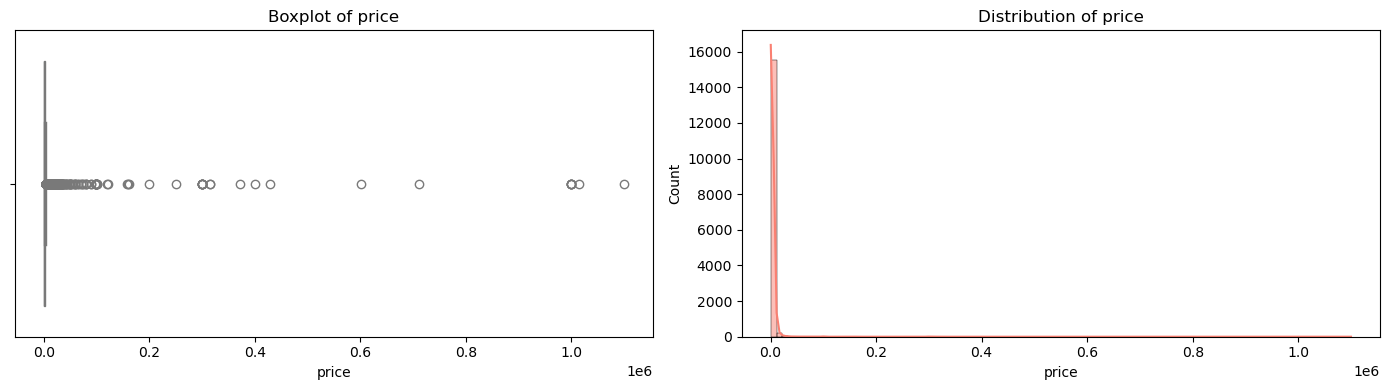

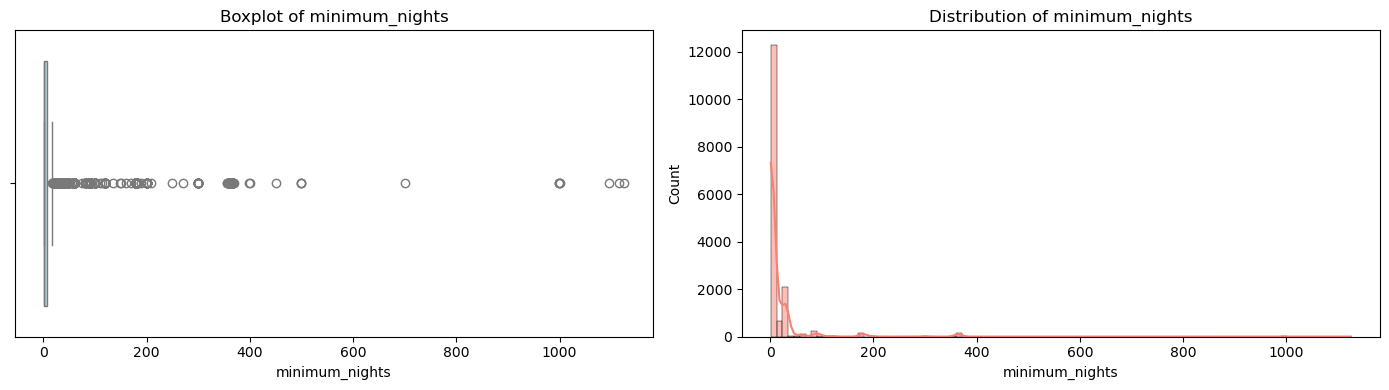

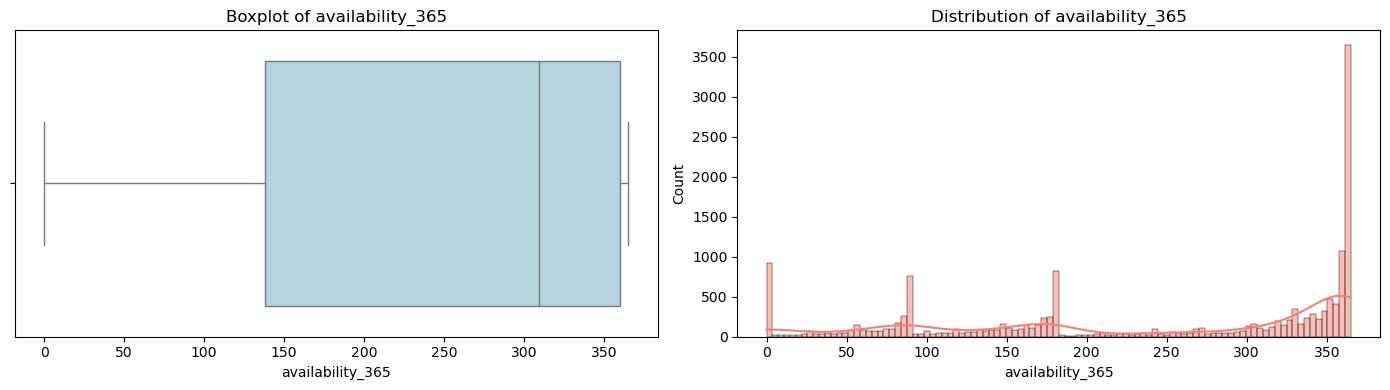

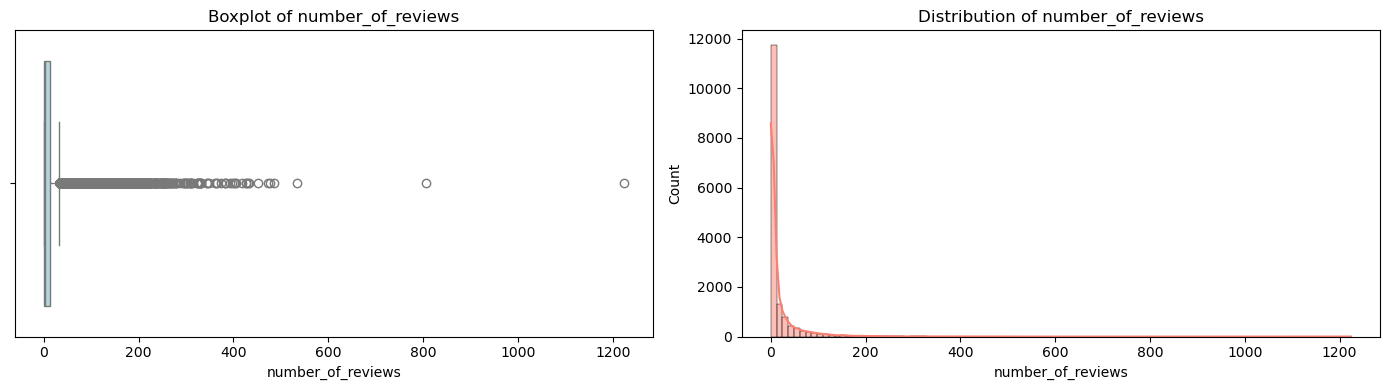

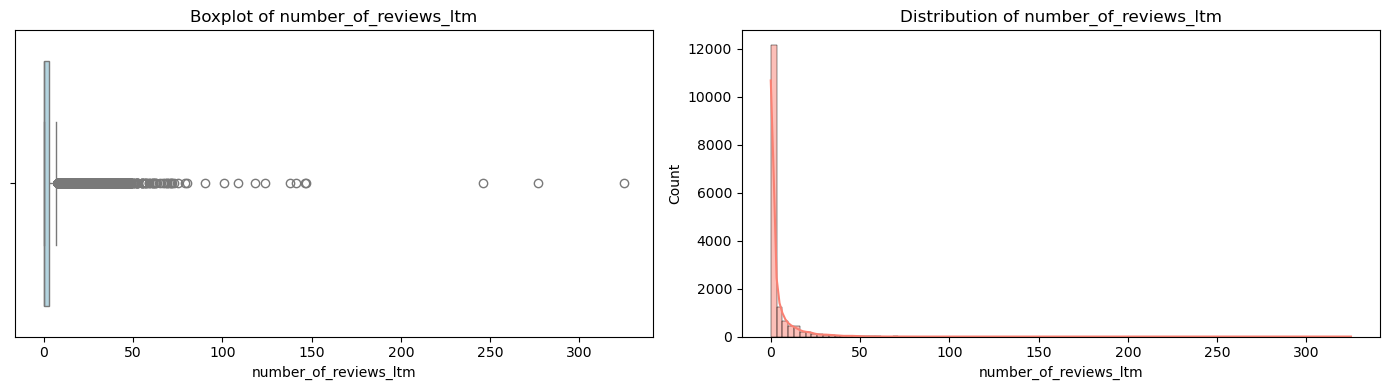

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ["price", "minimum_nights", "availability_365", "number_of_reviews", "number_of_reviews_ltm"]

# Plot side-by-side boxplot and histogram for each feature
for col in features:
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))
    
    # Boxplot
    sns.boxplot(x=df[col], ax=axes[0], color='lightblue')
    axes[0].set_title(f'Boxplot of {col}')
    
    # Histogram
    sns.histplot(df[col], bins=100, kde=True, ax=axes[1], color='salmon')
    axes[1].set_title(f'Distribution of {col}')
    
    plt.tight_layout()
    plt.show()

## Outlier Handling

### Price

Distribution:
Heavily right-skewed.

The `price` column shows the nightly rate set by the host. It is **heavily right-skewed**, with most listings priced between **฿500–฿5,000**, but some extreme values reach up to **฿1,100,000** which are likely luxury units or incorrect entries.

Outlier Detection

Extreme outliers can distort analysis and visualization, especially when calculating means or plotting charts. I considered two approaches:

1. **IQR method**  
   - Upper bound = Q3 + 1.5 × IQR  
   - Cutoff ≈ ฿4,700  
   - Removes ~11% of the listings — too aggressive and discards many valid listings in the mid-to-high price range.

2. **99th percentile method** ✅  
   - Cutoff = ฿18,000  
   - Removes only the top 1% of listings (likely anomalies or ultra-luxury properties).  
   - Preserves the realistic upper tail of the distribution while keeping the analysis clean and interpretable.

> I chose the **99th percentile** capping as it strikes a better balance between **cleaning the data** and **retaining valuable high-end listings**.

I removed listings where `price > 99th percentile`, resulting in a cleaner price distribution that’s still representative of the Bangkok Airbnb market. Log transformation can be applied later for visual clarity in Tableau or other tools, but wasn't applied to the dataset itself.

In [79]:
df_analysis['price'].describe().astype(int)

count      15753
mean        3226
std        25050
min          278
25%          900
50%         1430
75%         2443
max      1100000
Name: price, dtype: int32

In [80]:
# IQR method
Q1 = df_analysis["price"].quantile(0.25)
Q3 = df_analysis["price"].quantile(0.75)
IQR = Q3 - Q1
iqr_cap = Q3 + 1.5 * IQR

# Quantile method
q99_cap = df_analysis["price"].quantile(0.99)

print(f"IQR upper bound: {iqr_cap:.2f}")
print(f"99th percentile cap: {q99_cap:.2f}")

IQR upper bound: 4757.50
99th percentile cap: 18000.00


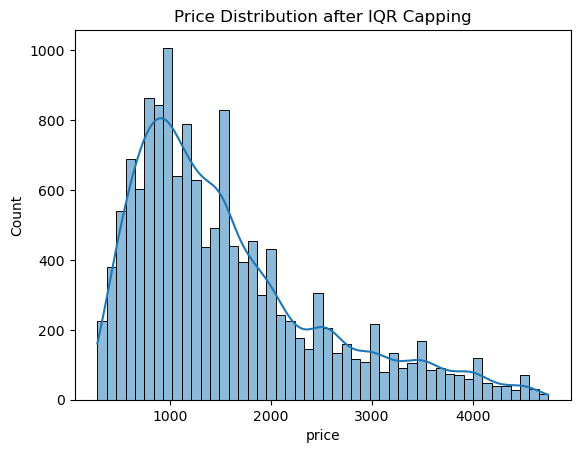

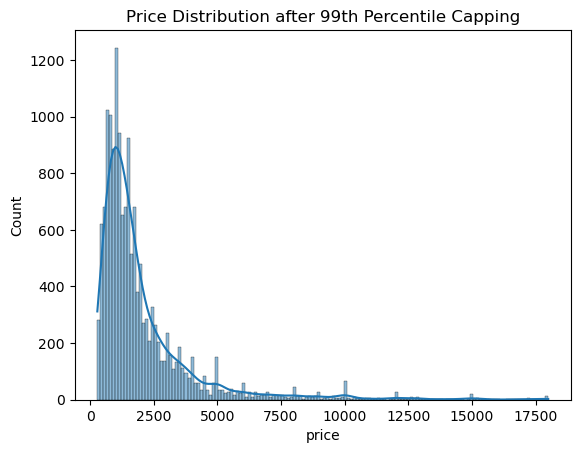

In [81]:
sns.histplot(df_analysis[df_analysis["price"] <= iqr_cap]["price"], kde=True)
plt.title("Price Distribution after IQR Capping")
plt.show()

sns.histplot(df_analysis[df_analysis["price"] <= q99_cap]["price"], kde=True)
plt.title("Price Distribution after 99th Percentile Capping")
plt.show()

In [82]:
# Calculate 99th percentile cutoff
q99_price = df_analysis["price"].quantile(0.99)

# Filter listings in the top 1% by price
top_1_percent = df_analysis[df_analysis["price"] > q99_price]

# Display summary and top listings
print(f"Number of listings in top 1%: {len(top_1_percent)}")
print(f"99th percentile price cutoff: {q99_price:.2f}")

# Show top 10 most expensive listings
top_1_percent_display = top_1_percent[["name", 'minimum_nights', "price"]].sort_values(by="price", ascending=False)
top_1_percent_display

Number of listings in top 1%: 152
99th percentile price cutoff: 18000.00


,name,minimum_nights,price
12794,New 1 bedroom apartment BTS MRT Asoke,14,1100000
12226,3B中文No Guest Service Fee@Nana Asok/Soi11 Night...,30,1014758
1237,"Modern,wifi,5m MRT&2 Shopping Mall",100,1000000
4612,"Modern&Luxury apartment,5min to MRT,freeWifi",1,1000000
6277,BTS轻轨线on nut站，全新一房一厅，临Tesco商场市集!New cozy 1BR,2,1000000
...,...,...,...
9073,Panoramic City View/Lounge Access/5min to Skyt...,1,18717
12989,Pool Villa 103,1,18714
5915,Chimelong Apartment,1,18701
13919,Villa 15,1,18643


In [83]:
top_1_percent_display.head(50)

,name,minimum_nights,price
12794,New 1 bedroom apartment BTS MRT Asoke,14,1100000
12226,3B中文No Guest Service Fee@Nana Asok/Soi11 Night...,30,1014758
1237,"Modern,wifi,5m MRT&2 Shopping Mall",100,1000000
4612,"Modern&Luxury apartment,5min to MRT,freeWifi",1,1000000
6277,BTS轻轨线on nut站，全新一房一厅，临Tesco商场市集!New cozy 1BR,2,1000000
9285,1BR cozy condo close to ONNUT BTS.,25,1000000
1776,"2 Bedroom,wifi,5mMRT&Shopping Mall",100,1000000
15114,80米轻轨站，空中泳池+健身房，I con siam沙吞河景圈，距离大皇宫4公里，乳胶床垫,12,710760
4366,rm 1 : cozy & comfy,1,600700
11812,🎗𝘾𝙝𝙚𝙬𝙖𝙩𝙝𝙖𝙞 𝙍𝙖𝙢𝙠𝙝𝙖𝙢𝙝𝙖𝙚𝙣𝙜\nBy KhunGrape,1,429443


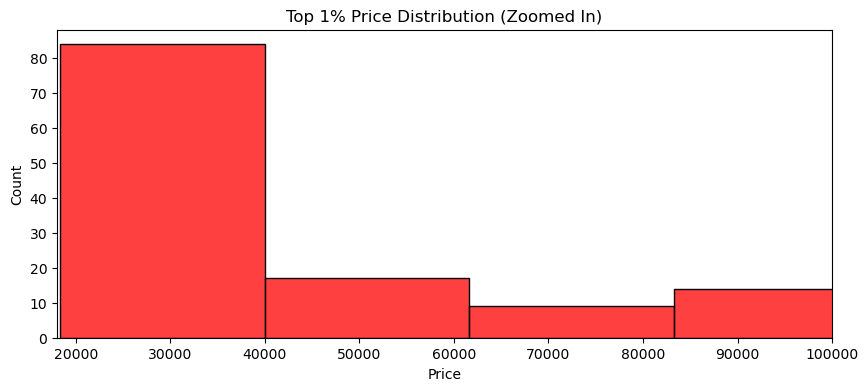

In [84]:
plt.figure(figsize=(10,4))
sns.histplot(top_1_percent["price"], bins=50, color='red')
plt.title("Top 1% Price Distribution (Zoomed In)")
plt.xlabel("Price")
plt.xlim(18000, 100000)
plt.show()

To clarify: `price` is price per night instead of `price per night * minimum_nights`

In [85]:
q99_price = df_analysis["price"].quantile(0.99)
df_analysis = df_analysis[df_analysis["price"] <= q99_price]
df_analysis['price'].describe().astype(int)

count    15601
mean      2068
std       2125
min        278
25%        900
50%       1404
75%       2381
max      18000
Name: price, dtype: int32

### Minimum Nights

This column represents the **minimum number of nights** a guest must stay to book the listing. Most Airbnb hosts in Bangkok offer short stays, but a few require unusually long minimum stays.

Distribution Summary

- Majority of listings allow 1–7 nights (75% of listings)
- Some listings allow **very long minimum stays** (e.g., 1125 nights)
- These outliers skew the data and are not practical for most travelers or analysts

Outlier Detection

I evaluated two statistical approaches:

1. **IQR method**  
   - Upper bound = Q3 + 1.5 × IQR = **16 nights**  
   - Removes over **30%** of listings — too restrictive for Bangkok’s flexible rental market

2. **99th percentile method**  
   - Cutoff = **360 nights**  
   - Removes only the most extreme listings (1%)  
   - Too lenient — listings requiring > 90 nights are still unrealistic for typical Airbnb use

Final Approach: **Fixed 60-Night Cap**

I capped listings at a **maximum of 60 nights**, based on:

- Common Airbnb rental use cases (short to mid-term stays)
- Thailand’s **tourist visa duration** (typically allows stays of 30–60 days)
- A natural gap in the histogram showing very few listings beyond 60 nights

This cutoff balances business logic with data quality — removing **only ~5% of listings** that are unlikely to reflect typical Airbnb behavior.

Listings with `minimum_nights > 60` were removed from the dataset.  

In [86]:
df_analysis["minimum_nights"].describe()

count    15601.000000
mean        15.085443
std         49.567952
min          1.000000
25%          1.000000
50%          1.000000
75%          7.000000
max       1125.000000
Name: minimum_nights, dtype: float64

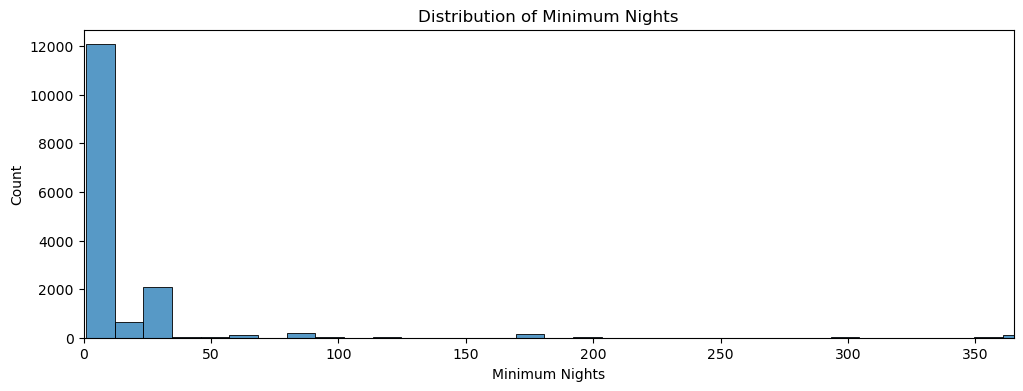

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 4))
sns.histplot(df_analysis["minimum_nights"], bins=100)
plt.title("Distribution of Minimum Nights")
plt.xlabel("Minimum Nights")
plt.xlim(0, 365)  # Zoom in on the typical range
plt.show()

In [88]:
# IQR Method
Q1 = df_analysis["minimum_nights"].quantile(0.25)
Q3 = df_analysis["minimum_nights"].quantile(0.75)
IQR = Q3 - Q1
iqr_cutoff = Q3 + 1.5 * IQR

# 99th Percentile Method
percentile_99_cutoff = df_analysis["minimum_nights"].quantile(0.99)

# Display the results
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")
print(f"IQR-based upper bound: {iqr_cutoff:.2f}")
print(f"99th percentile cutoff: {percentile_99_cutoff:.2f}")


Q1 (25th percentile): 1.0
Q3 (75th percentile): 7.0
IQR: 6.0
IQR-based upper bound: 16.00
99th percentile cutoff: 360.00


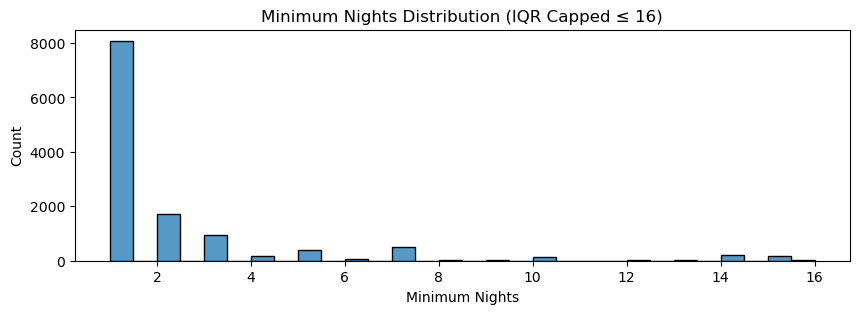

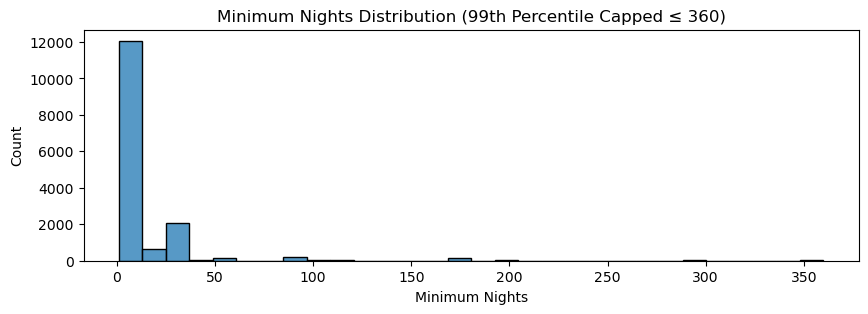

In [89]:
# Prepare trimmed DataFrames
iqr_trimmed = df_analysis[df_analysis["minimum_nights"] <= iqr_cutoff]
percentile_trimmed = df_analysis[df_analysis["minimum_nights"] <= percentile_99_cutoff]

# Plot 1: IQR-Based
plt.figure(figsize=(10, 3))
sns.histplot(iqr_trimmed["minimum_nights"], bins=30, kde=False)
plt.title("Minimum Nights Distribution (IQR Capped ≤ 16)")
plt.xlabel("Minimum Nights")
plt.show()

# Plot 2: 99th Percentile
plt.figure(figsize=(10, 3))
sns.histplot(percentile_trimmed["minimum_nights"], bins=30, kde=False)
plt.title("Minimum Nights Distribution (99th Percentile Capped ≤ 360)")
plt.xlabel("Minimum Nights")
plt.show()

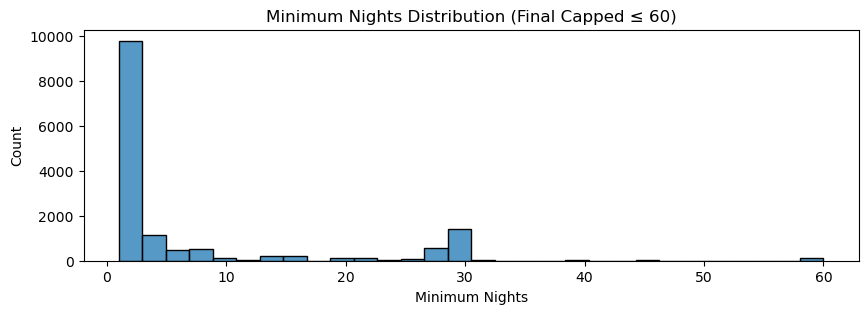

In [90]:
final_cutoff = 60
final_trimmed = df_analysis[df_analysis["minimum_nights"] <= final_cutoff]

# Plot 3: Final Cutoff (60)
plt.figure(figsize=(10, 3))
sns.histplot(final_trimmed["minimum_nights"], bins=30, kde=False)
plt.title("Minimum Nights Distribution (Final Capped ≤ 60)")
plt.xlabel("Minimum Nights")
plt.show()

In [91]:
max_30_nights_listings = df_analysis[df_analysis["minimum_nights"] <= 30]
between_30_and_60_nights_listings = df_analysis[(df_analysis["minimum_nights"] > 30) & (df_analysis["minimum_nights"] <= 60)]

print(f"Number of listings with minimum nights <= 30: {len(max_30_nights_listings)}")
print(f"Number of listings with minimum nights between 30 and 60: {len(between_30_and_60_nights_listings)}")

Number of listings with minimum nights <= 30: 14755
Number of listings with minimum nights between 30 and 60: 197


Although most listings fall under 30 nights, a few valid listings exist in the 31–60 night range. Capping at 60 gives us the best of both worlds:

It removes long-term lease behavior (>60)

Keeps legitimate mid-term Airbnb use cases

Preserves alignment with visa policy and business logic

In [92]:
# Total rows before removal
total_rows = len(df_analysis)

# Detect outliers
outliers = df_analysis[df_analysis["minimum_nights"] > 60]
num_outliers = len(outliers)

# Calculate what percent of the data that is
percentage = (num_outliers / total_rows) * 100

# Step 4: Display results
print(f"Total listings              : {total_rows}")
print(f"Outliers (> 60 nights)      : {num_outliers}")
print(f"Percentage of outliers      : {percentage:.2f}%")

Total listings              : 15601
Outliers (> 60 nights)      : 649
Percentage of outliers      : 4.16%


In [93]:
df_analysis = df_analysis[df_analysis["minimum_nights"] <= 60]

In [94]:
df_analysis['minimum_nights'].describe()

count    14952.000000
mean         6.913925
std         11.133535
min          1.000000
25%          1.000000
50%          1.000000
75%          5.000000
max         60.000000
Name: minimum_nights, dtype: float64

After analyzing the distribution, statistical cutoffs, and business context, I chose to cap minimum_nights at 60 nights. Here's why:

Most listings (75%) require 5 nights or fewer.

Listings between 30–60 nights, while few, are legitimate mid-term rentals that align with:

Airbnb’s “monthly stay” category,

Thailand’s tourist visa extension policy (up to 60 days),

Remote workers and digital nomads.

Although the IQR cutoff was 16 nights, it would have removed valuable monthly listings. The 99th percentile cutoff was 360 nights, which is too lenient and includes non-Airbnb-style leases.

Might consider changing the cutoff to 90 nights since it has a higher peak than 60 nights, and it still satisfy the maximum tourist visa someone can get

### Availability 365

Distribution:
Many listings are available all year (365).

A noticeable portion are only available a few days or not at all (0).

Outliers:
No 'outliers' in the typical sense, but 0 could be interpreted as a potential inactive listing.

In [95]:
# 1. Descriptive statistics
print("Descriptive statistics:")
print(df_analysis["availability_365"].describe())

Descriptive statistics:
count    14952.000000
mean       242.503545
std        126.085798
min          0.000000
25%        134.000000
50%        306.000000
75%        360.000000
max        365.000000
Name: availability_365, dtype: float64


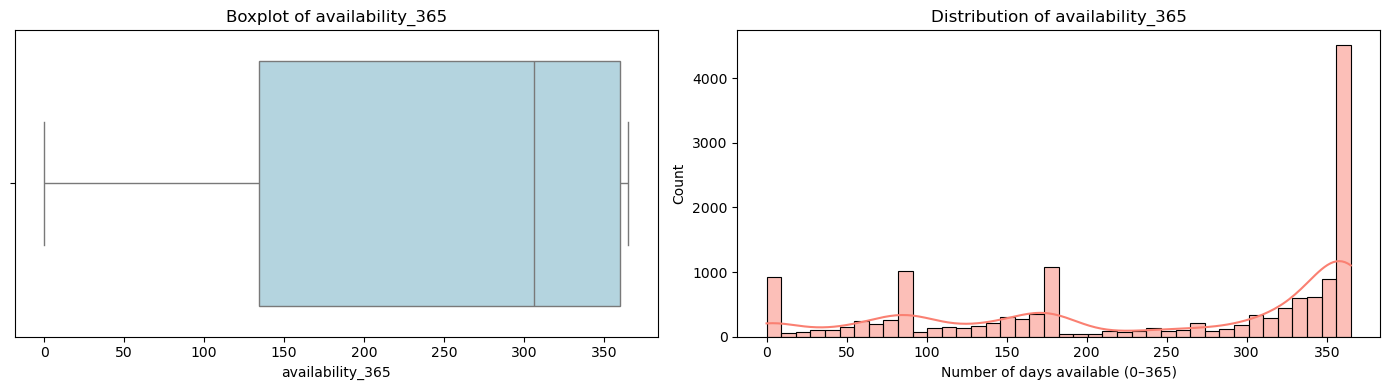

In [96]:
# 2. Visualization: Boxplot & Histogram (side by side)
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Boxplot
sns.boxplot(x=df_analysis["availability_365"], ax=axes[0], color='lightblue')
axes[0].set_title("Boxplot of availability_365")

# Histogram
sns.histplot(df_analysis["availability_365"], bins=40, ax=axes[1], kde=True, color='salmon')
axes[1].set_title("Distribution of availability_365")
axes[1].set_xlabel("Number of days available (0–365)")

plt.tight_layout()
plt.show()

When I look at the distribution & boxplot, there is no outlier detected. However, there are values of 0 which are concerning. Values of 0 means that the listing is not available at all for booking in the next 365 days, which means either the listing is fully booked for the whole year (very unlikely, but still possible) or the listing is no longer active/available for booking but isn't deleted from the site.

In [97]:
listings_with_0_availability = df_analysis[df_analysis["availability_365"] == 0]

In [98]:
# 3. Outlier detection
unavailable_count = listings_with_0_availability.shape[0]
total = df_analysis.shape[0]
percentage = (unavailable_count / total) * 100

print(f"Listings with availability_365 == 0: {unavailable_count} ({percentage:.2f}% of all listings)")

Listings with availability_365 == 0: 828 (5.54% of all listings)


In [99]:
df['last_review'].describe()

count                            10064
mean     2021-08-30 08:37:49.316375296
min                2012-12-15 00:00:00
25%                2020-02-20 00:00:00
50%                2022-10-24 00:00:00
75%                2022-12-08 00:00:00
max                2022-12-28 00:00:00
Name: last_review, dtype: object

There are 828 (5.54% of data) listings that have 0 availability. I need to check why they are listed as 0

In [100]:
listings_with_0_availability.head()

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,has_review,name_standardized
51,Chic two bedroom for Monthly rental,3323622,Phoebe,Bang Rak,13.72687,100.52725,Entire home/apt,2701,30,104,2020-02-20,0.89,1,0,0,True,chic two bedroom for monthly rental
104,"Beautiful Apt @ Ratchayothin BTS, Free Wifi",2592798,Nokina,Chatu Chak,13.82841,100.57103,Entire home/apt,1004,2,24,2018-07-22,0.19,2,0,0,True,"beautiful apt @ ratchayothin bts, free wifi"
141,"Private Room@Chatuchak,BTS,JJ market,DMK airport",2087671,Apipu,Phaya Thai,13.79221,100.54631,Private room,399,1,33,2020-03-15,0.78,1,0,0,True,"private room@chatuchak,bts,jj market,dmk airport"
152,Contemporary Modern Duplex - Thonglor,5394070,Eva,Khlong Toei,13.72242,100.57962,Entire home/apt,1489,30,81,2022-10-07,0.72,1,0,3,True,contemporary modern duplex - thonglor
205,Cozy Apt @ Ratchayothin BTS Great Facility,2592798,Nokina,Chatu Chak,13.83028,100.57065,Entire home/apt,866,4,9,2021-12-14,0.08,2,0,0,True,cozy apt @ ratchayothin bts great facility


In [101]:
# See how many of them have zero reviews (lifetime and recent)
no_reviews = listings_with_0_availability[
    (listings_with_0_availability["number_of_reviews"] == 0)
]

no_reviews_ltm = listings_with_0_availability[
    (listings_with_0_availability["number_of_reviews_ltm"] == 0)
]

# Count breakdown
print(f"Total listings with availability_365 == 0: {len(listings_with_0_availability)}")
print(f"Of those, listings with zero reviews all time: {len(no_reviews)}")
print(f"→ Percentage with zero reviews: {(len(no_reviews) / len(listings_with_0_availability)) * 100:.2f}%")
print(f"Of those, listings with zero reviews in the last 12 months: {len(no_reviews_ltm)}")
print(f"→ Percentage with zero reviews: {(len(no_reviews_ltm) / len(listings_with_0_availability)) * 100:.2f}%")

Total listings with availability_365 == 0: 828
Of those, listings with zero reviews all time: 238
→ Percentage with zero reviews: 28.74%
Of those, listings with zero reviews in the last 12 months: 671
→ Percentage with zero reviews: 81.04%


81% of these listings had no review in the last 12 months, and 29% had no review ever (likely to be never booked). This supports our hypothesis that these listings may not be active anymore, but the hosts decided to still keep the listings online. I can safely remove them since they are 'ghost' listings.

In [102]:
has_review_ltm = listings_with_0_availability[
    (listings_with_0_availability["number_of_reviews_ltm"] > 0)
]

has_review_ltm.sort_values(by="number_of_reviews_ltm", ascending=False).head()

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,has_review,name_standardized
10844,HEARTWARMING APARTMENT:3BR/MRT/POOL/,79624768,Eva,Huai Khwang,13.76122,100.56945,Entire home/apt,6071,1,53,2022-12-12,1.75,44,0,44,True,heartwarming apartment:3br/mrt/pool/
10439,Comfy Minimal+10mins walk to BTS+24HRS superma...,59469138,Vasin,Vadhana,13.72933,100.58310,Entire home/apt,2425,2,33,2022-12-16,1.06,2,0,32,True,comfy minimal+10mins walk to bts+24hrs superma...
9898,"BTS PhoNimit, 1BR Great facilities with WiFi",49929391,Tanya,Thon buri,13.71796,100.48197,Entire home/apt,700,3,34,2022-12-19,1.00,1,0,30,True,"bts phonimit, 1br great facilities with wifi"
9633,"Baan No.45 (unit A), house in center of Bangkok",317285255,Patty,Phra Nakhon,13.75507,100.49943,Entire home/apt,2800,2,33,2022-11-21,0.91,3,0,24,True,"baan no.45 (unit a), house in center of bangkok"
12296,Penthouse w incredible city view @Sukhumvit/中文服务,292407038,Eugene,Vadhana,13.74039,100.56338,Entire home/apt,5142,3,23,2022-12-11,2.68,2,0,23,True,penthouse w incredible city view @sukhumvit/中文服务


In [103]:
has_review_ltm[['minimum_nights', 'number_of_reviews_ltm', 'last_review']].describe()

,minimum_nights,number_of_reviews_ltm,last_review
count,157.000000,157.000000,157
mean,7.420382,5.541401,2022-08-29 08:24:27.515923456
min,1.000000,1.000000,2021-12-29 00:00:00
25%,1.000000,1.000000,2022-07-25 00:00:00
50%,2.000000,3.000000,2022-09-26 00:00:00
75%,7.000000,6.000000,2022-11-17 00:00:00
max,45.000000,44.000000,2022-12-27 00:00:00
std,10.926988,6.794125,NaN


Removing Listings with `availability_365 == 0`

To ensure I are only analyzing active and bookable listings, I examined all 831 listings with `availability_365 == 0`.

Key Findings:
- **81.11%** of them had **no reviews in the past 12 months**
- **29.00%** of them had **no reviews ever** (likely never booked)

This strongly suggests that these listings are either:
- Inactive
- Abandoned
- Blocked by the host
- Or "ghost listings" created but never launched

Since they are not available for future bookings and contribute nothing to demand/pricing trends, I **excluded them from the analysis**.

Even though there are listings with recent reviews, those listings have a minimum nights of < 45, meaning it's very unlikely that they have been fully booked a year in advance. These listings are probably going to be inactive since the hosts haven't made them available at all. So, I'll exclude them too

In [104]:
# Remove listings with availability_365 == 0
df_analysis = df_analysis[df_analysis["availability_365"] > 0]

In [105]:
# Confirm after cleaning
print("New availability_365 stats after removing zeroes:")
print(df_analysis["availability_365"].describe())

New availability_365 stats after removing zeroes:
count    14124.000000
mean       256.719980
std        114.803177
min          1.000000
25%        158.000000
50%        320.000000
75%        360.000000
max        365.000000
Name: availability_365, dtype: float64


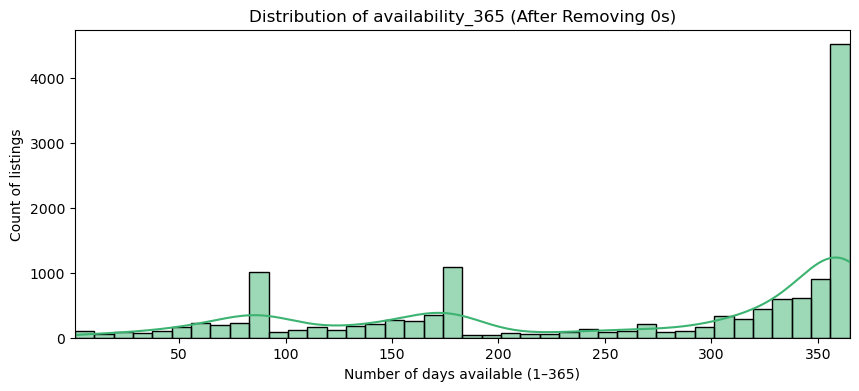

In [106]:
plt.figure(figsize=(10, 4))
sns.histplot(df_analysis["availability_365"], bins=40, kde=True, color='mediumseagreen')
plt.title("Distribution of availability_365 (After Removing 0s)")
plt.xlabel("Number of days available (1–365)")
plt.ylabel("Count of listings")
plt.xlim(1, 365)  # Ensure the x-axis starts at 1
plt.show()

Final Cleaning & Analysis of `availability_365`

After analyzing and confirming that listings with `availability_365 == 0` are most likely **inactive or hidden by hosts**, I removed 831 such listings from the dataset. These listings:
- Are not bookable in the next year,
- 81.1% had no reviews in the last 12 months,
- 29.0% had no reviews ever.

They offer no value in assessing market demand or availability, and likely distort any meaningful insights.

Distribution After Cleaning:

- Most listings are available **more than 150 days/year**
- Strong spikes at **90, 180, and 365**, showing seasonal and full-time patterns
- **Average availability is ~256 days**, suggesting hosts tend to stay open most of the year

### Number of Reviews

Distribution:
Most listings have 0–20 reviews, a few have hundreds.

Very long right tail (some have 1000+ reviews).

Outliers:
Not necessarily invalid as these are probably top-performing listings.

In [107]:
df_analysis["number_of_reviews"].describe()

count    14124.000000
mean        17.350750
std         41.876633
min          0.000000
25%          0.000000
50%          2.000000
75%         14.000000
max       1224.000000
Name: number_of_reviews, dtype: float64

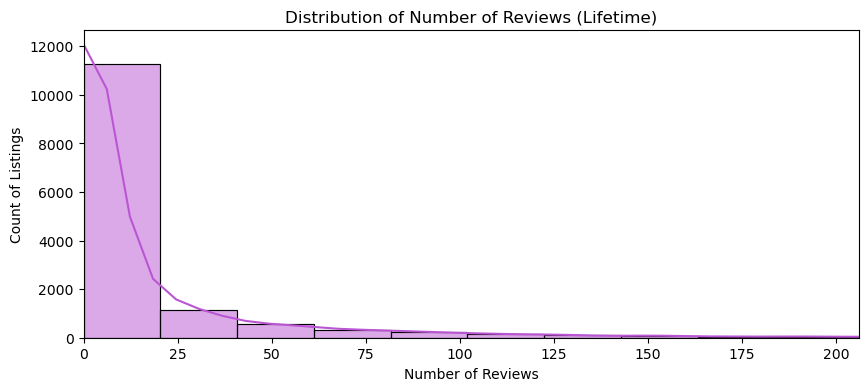

In [108]:
plt.figure(figsize=(10, 4))
sns.histplot(df_analysis["number_of_reviews"], bins=60, kde=True, color='mediumorchid')
plt.title("Distribution of Number of Reviews (Lifetime)")
plt.xlabel("Number of Reviews")
plt.ylabel("Count of Listings")
plt.xlim(0, df_analysis["number_of_reviews"].quantile(0.99))  # zoom in to cut extreme outliers
plt.show()


High number of reviews are not a bad thing, they are actually very useful to distinguish between high demand and low demand listings. So, I will not give any treatment to the "outliers"

### Number of Reviews in the Last 12 Months

This column tracks how many reviews a listing has received in the past year, which is a **strong proxy for recent demand**. I use this to detect **trending or high-demand areas**, especially in our **Hidden Gems** theme.

Don't remove outliers, removing top 1% still has outliers anyway

In [109]:
df_analysis["number_of_reviews_ltm"].describe()

count    14124.000000
mean         3.814005
std          9.325653
min          0.000000
25%          0.000000
50%          0.000000
75%          4.000000
max        325.000000
Name: number_of_reviews_ltm, dtype: float64

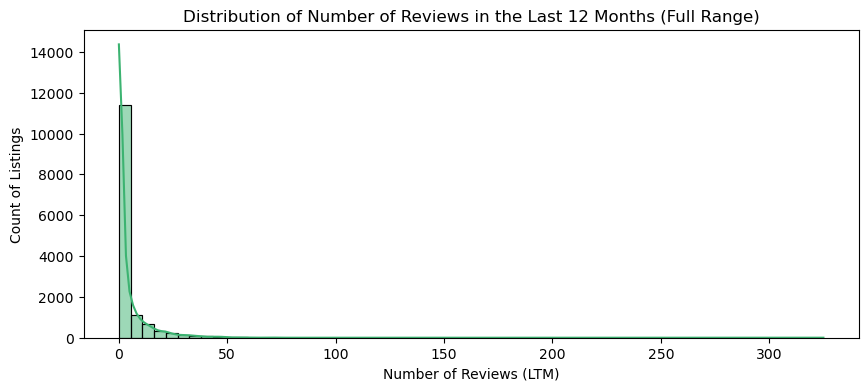

In [110]:
plt.figure(figsize=(10, 4))
sns.histplot(df_analysis["number_of_reviews_ltm"], bins=60, kde=True, color='mediumseagreen')
plt.title("Distribution of Number of Reviews in the Last 12 Months (Full Range)")
plt.xlabel("Number of Reviews (LTM)")
plt.ylabel("Count of Listings")
plt.show()


# Summary

In [111]:
df_cleaned = df_analysis.copy()
df_cleaned = df_cleaned.reset_index(drop=True)
df_cleaned.head()

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,has_review,name_standardized
0,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0,True,nice room with superb city view
1,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaT,0.00,2,358,0,False,"easy going landlord,easy place"
2,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaT,0.00,1,365,0,False,modern-style apartment in bangkok
3,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1,True,spacious one bedroom at the kris condo bldg. 3
4,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaT,0.00,3,365,0,False,suite room 3 at metropoint


In [112]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14124 entries, 0 to 14123
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   name                            14124 non-null  object        
 1   host_id                         14124 non-null  int64         
 2   host_name                       14124 non-null  object        
 3   neighbourhood                   14124 non-null  object        
 4   latitude                        14124 non-null  float64       
 5   longitude                       14124 non-null  float64       
 6   room_type                       14124 non-null  object        
 7   price                           14124 non-null  int64         
 8   minimum_nights                  14124 non-null  int64         
 9   number_of_reviews               14124 non-null  int64         
 10  last_review                     9092 non-null   datetime64[ns]
 11  re

In [113]:
# Final selected columns
final_columns = [
    'neighbourhood', 'latitude', 'longitude', 'room_type',
    'price', 'minimum_nights', 'number_of_reviews',
    'last_review', 'availability_365', 'number_of_reviews_ltm',
    'has_review'
]

# Filter the DataFrame
df_final = df_cleaned[final_columns]
df_final.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,availability_365,number_of_reviews_ltm,has_review
0,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,353,0,True
1,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaT,358,0,False
2,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaT,365,0,False
3,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,323,1,True
4,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaT,365,0,False


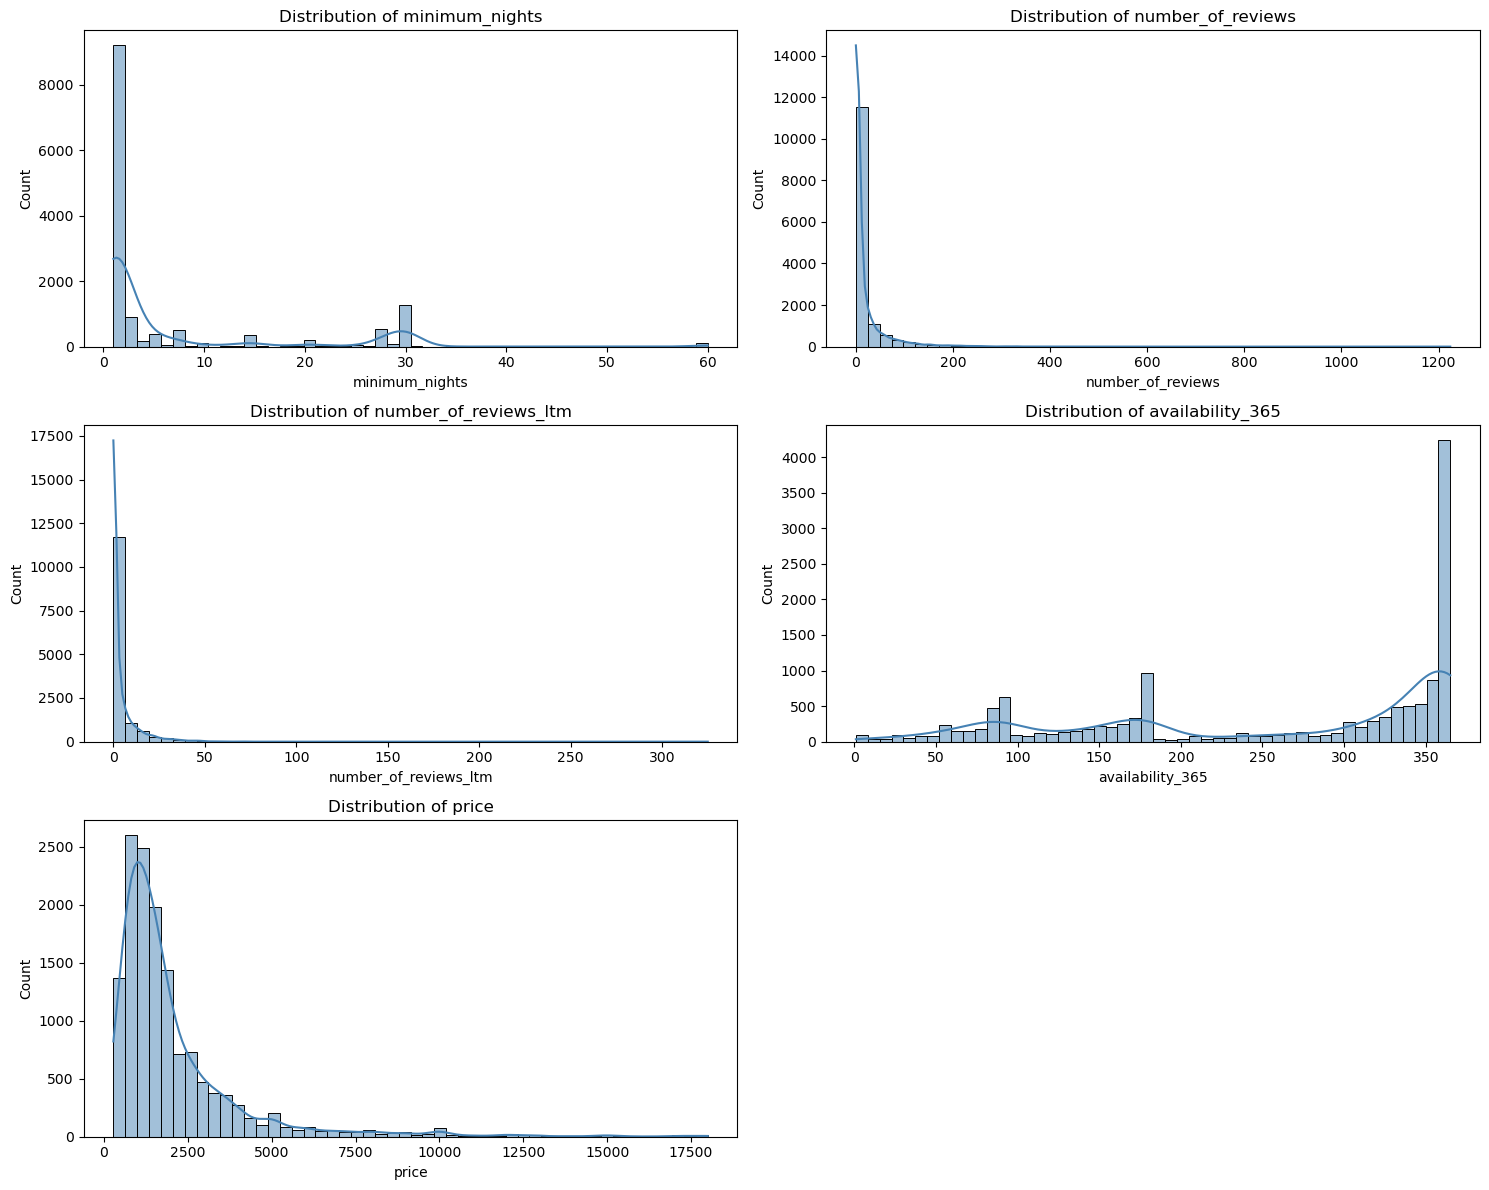

In [114]:
# List of numeric columns to visualize
num_cols = [
    'minimum_nights', 'number_of_reviews',
    'number_of_reviews_ltm', 'availability_365', 'price'
]

# Plot histograms
plt.figure(figsize=(15, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df_final[col], kde=True, bins=50, color='steelblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
plt.tight_layout()
plt.show()

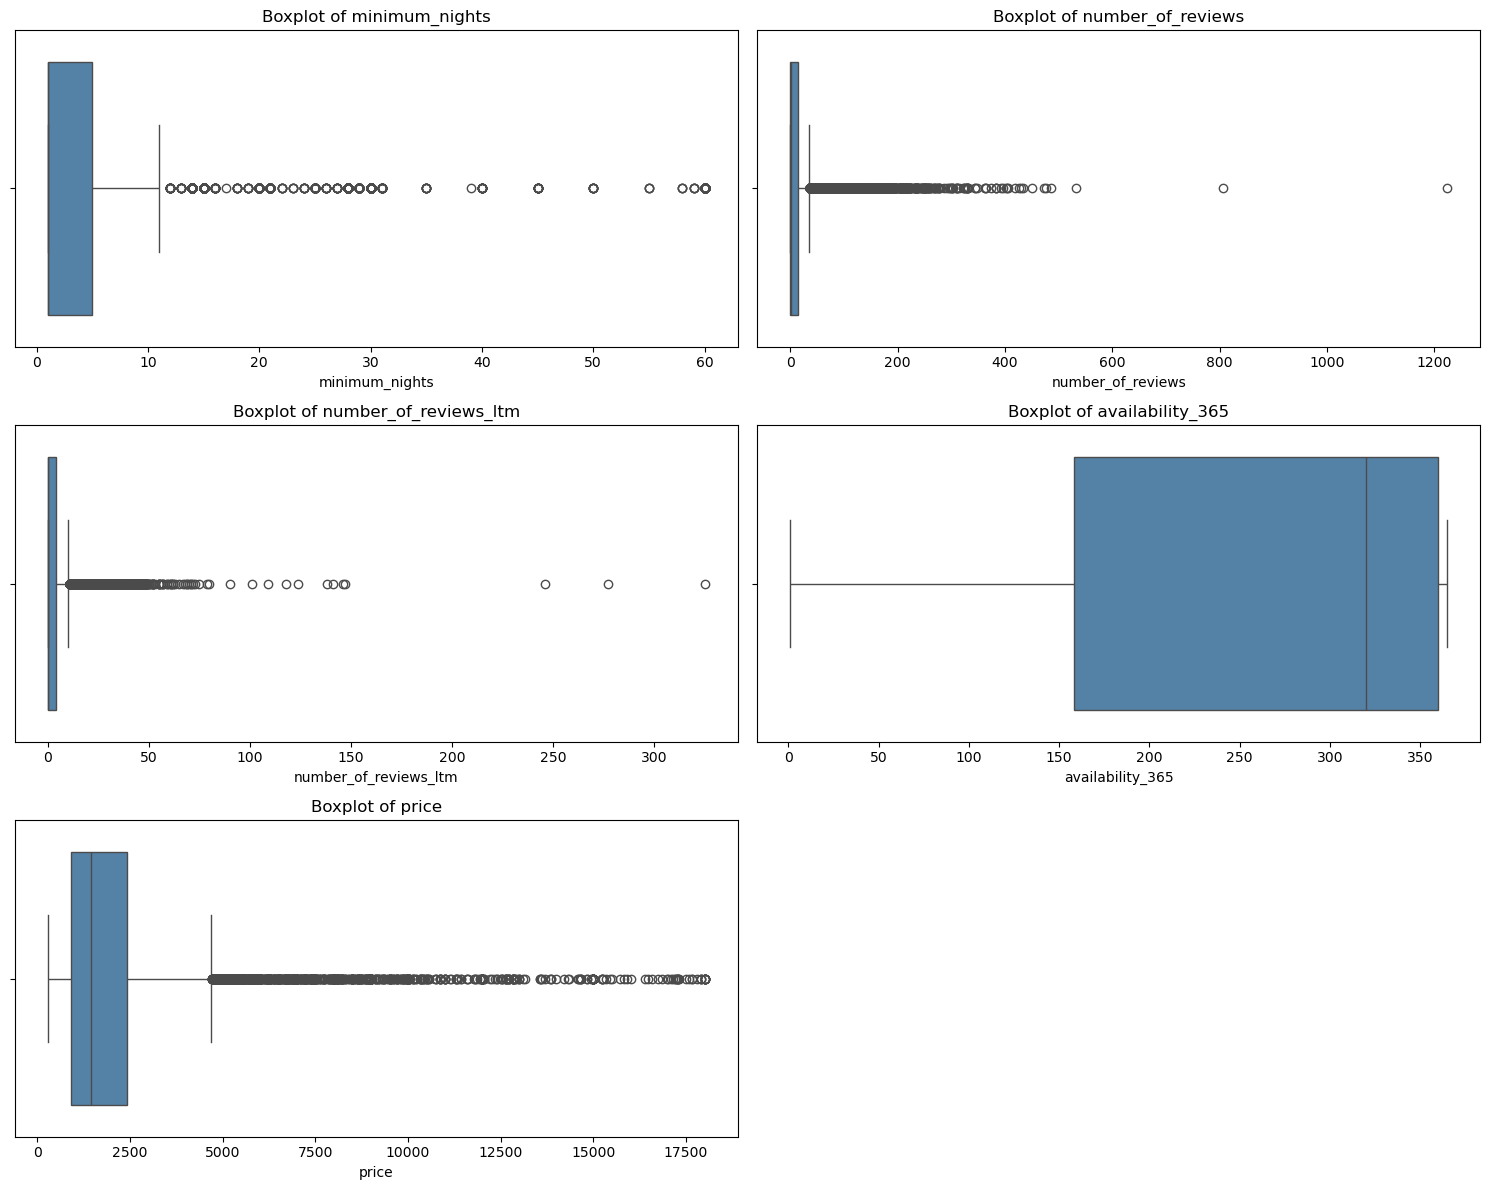

In [115]:
# Plot boxplots
plt.figure(figsize=(15, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df_final[col], color='steelblue')
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
plt.tight_layout()
plt.show()

In [116]:
# Save the final cleaned dataset
df_final.to_csv("Cleaned Airbnb Listings Bangkok.csv", index=False)

# Data Preparation

Since I'm are working on demand & supply analysis on a neighbourhood-level, we need geospatial data for each neighbourhoods. However, the current dataset only contains latitude & longitude of each listing, which isn't sufficient for the analysis I'm going to do. Therefore, I'm going to add external (and credible) data regarding the geography of each neighbourhoods.

This dataset is lacking some crucial features that can clearly indicates demand & supply of each neighbourhoods, e.g. number of nights booked and availability in the past. Therefore, I'm going to create a scoring system using the features that exists in the dataset to objectively measure both demand & supply in each neighbourhoods.

In [117]:
df = pd.read_csv('Cleaned Airbnb Listings Bangkok.csv')
df.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,availability_365,number_of_reviews_ltm,has_review
0,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,353,0,True
1,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,358,0,False
2,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,365,0,False
3,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,323,1,True
4,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,365,0,False


## Calculating Demand

Reviews LTM is the best indicator for recent demand, and it's supported by availability 365. However, since availability 365 is not strongly reliable as reviews LTM, we will give more weight to reviews LTM when combining them to calculate the demand score.

Demand = 0.7 * reviews LTM + 0.3 * availability 365

Demand = Number of reviews in the last 12 months + Availability in the next 365 days

We use a weighted method of 0.7 reviews and 0.3 availability since reviews is more reliable to indicate demand

Instead of using the raw numbers of both features, we will rank them to get the relative score of each neighbourhoods. This will make the calculation more robust as well since they both have different scales

In [118]:
# Assume availability 365 indicates the number of days the listing has been booked (general assumption)
df['booked_rate'] = 1 - df['availability_365']/365

# Rank the reviews and booked rate relative to each other using percentile ranking
df['p_reviews'] = df['number_of_reviews_ltm'].rank(pct=True)
df['p_booked'] = df['booked_rate'].rank(pct=True)

df['demand_score'] = 0.7 * df['p_reviews'] + 0.3 * df['p_booked']
df.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,availability_365,number_of_reviews_ltm,has_review,booked_rate,p_reviews,p_booked,demand_score
0,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,353,0,True,0.032877,0.274745,0.341440,0.294754
1,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,358,0,False,0.019178,0.274745,0.289861,0.279280
2,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,365,0,False,0.000000,0.274745,0.074483,0.214667
3,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,323,1,True,0.115068,0.598626,0.488601,0.565619
4,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,365,0,False,0.000000,0.274745,0.074483,0.214667


In [119]:
df.sort_values(by='demand_score', ascending=False).head(10)

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,availability_365,number_of_reviews_ltm,has_review,booked_rate,p_reviews,p_booked,demand_score
10803,Khlong Toei,13.73821,100.55784,Entire home/apt,3226,1,47,2022-12-23,9,47,True,0.975342,0.994831,0.993168,0.994332
3533,Vadhana,13.73622,100.56196,Entire home/apt,2400,1,223,2022-12-26,18,47,True,0.950685,0.994831,0.989592,0.993260
8262,Khlong Toei,13.73485,100.55881,Entire home/apt,2229,1,75,2022-11-26,22,48,True,0.939726,0.995469,0.987928,0.993207
10701,Khlong Toei,13.73653,100.55940,Entire home/apt,2509,1,43,2022-12-27,5,43,True,0.986301,0.992106,0.994477,0.992817
3496,Khlong Toei,13.72556,100.56302,Entire home/apt,2857,2,329,2022-12-16,35,62,True,0.904110,0.998124,0.978016,0.992091
9699,Khlong Toei,13.73805,100.55898,Entire home/apt,4257,1,61,2022-12-23,33,56,True,0.909589,0.997345,0.979291,0.991929
9363,Vadhana,13.73893,100.56704,Entire home/apt,3000,2,43,2022-12-21,2,39,True,0.994521,0.989628,0.996318,0.991635
4265,Vadhana,13.73863,100.55890,Entire home/apt,2000,1,190,2022-12-21,24,43,True,0.934247,0.992106,0.986831,0.990523
4060,Vadhana,13.73702,100.56118,Entire home/apt,2106,1,232,2022-12-17,39,51,True,0.893151,0.996495,0.975609,0.990229
9224,Phaya Thai,13.79078,100.54848,Entire home/apt,953,1,206,2022-12-13,50,141,True,0.863014,0.999646,0.966192,0.989610


In [120]:
df[['number_of_reviews_ltm', 'p_reviews', 'booked_rate', 'p_booked', 'demand_score']].describe()

,number_of_reviews_ltm,p_reviews,booked_rate,p_booked,demand_score
count,14124.000000,14124.000000,14124.000000,14124.000000,14124.000000
mean,3.814005,0.500035,0.296658,0.500035,0.500035
std,9.325653,0.263458,0.314529,0.288185,0.224547
min,0.000000,0.274745,0.000000,0.074483,0.214667
25%,0.000000,0.274745,0.013699,0.258355,0.289539
50%,0.000000,0.274745,0.123288,0.498867,0.454131
75%,4.000000,0.762178,0.567123,0.750389,0.699441
max,325.000000,1.000000,0.997260,0.998442,0.994332


The minimum percentile rank for `p_reviews` is ≈ 27% because that's the amount of listings with 0 reviews in the last 12 months, so they all belong in the 27th percentile. This logic applies to `p_booked` as well, and they both affect the min of `demand_score`.

However, this is not something to worry about since all we really care about is relative position, as long as we're consistent for both features (reviews & availability), the combined demand score still ranks correctly. Now, we have the demand score of each listings.

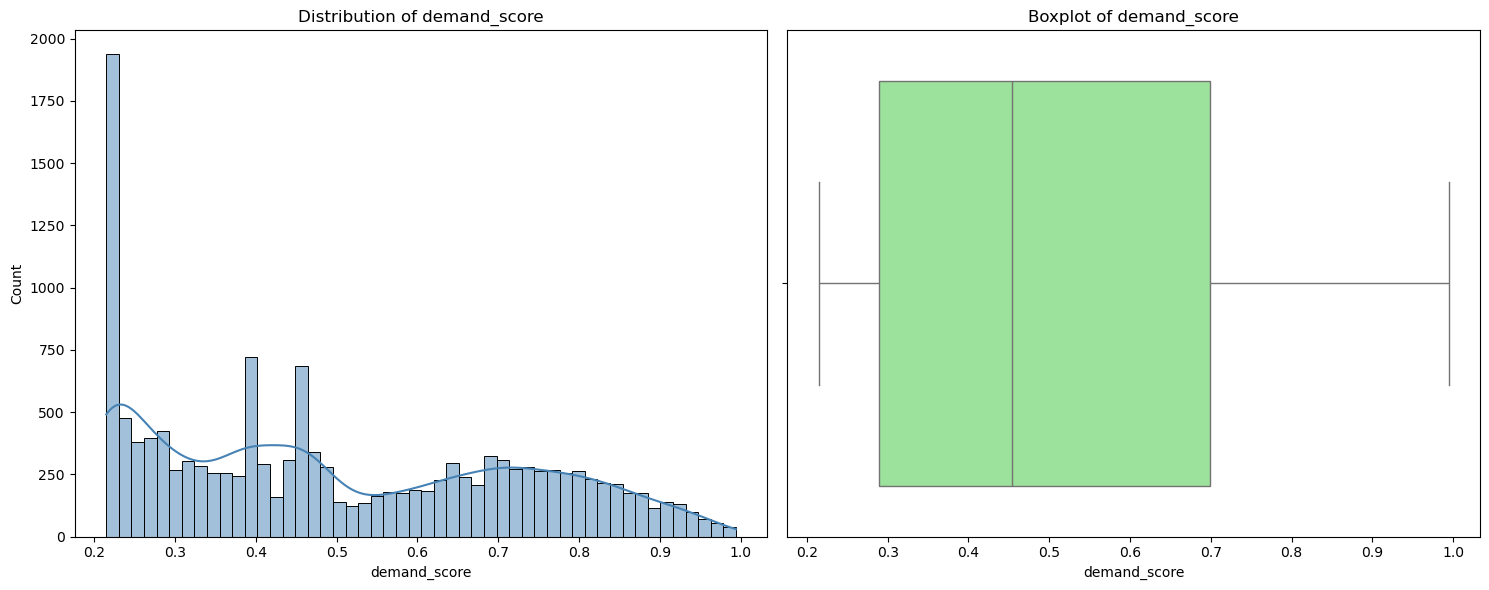

In [121]:
col = 'demand_score'
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Histogram
sns.histplot(df[col], kde=True, bins=50, color='steelblue', ax=axes[0])
axes[0].set_title(f"Distribution of {col}")
axes[0].set_xlabel(col)
axes[0].set_ylabel("Count")

# Boxplot
sns.boxplot(x=df[col], ax=axes[1], color='lightgreen')
axes[1].set_title(f"Boxplot of {col}")
axes[1].set_xlabel(col)

plt.tight_layout()
plt.show()

The distribution is not perfectly symmetrical as it's quite stretched by the huge amount of listings with the lowest demand score. To make the analysis more robust, I'll choose the median when I need to work with demand score.

## Convert dataset from listing-level to neighbourhood-level

The current dataset is detailed to each listing, but I want to do analysis on the neighbourhood-level. So, I'll have to aggregate these listings data based on their neighbourhoods. This is also required to calculate supply

In [122]:
neighbourhood_df = df.groupby('neighbourhood').agg(
    listings_count = ('neighbourhood', 'count'),
    demand_median = ("demand_score",    "median"),     # "typical" demand based on distribution
    demand_sum = ("demand_score",    "sum"),      # total market demand
    price_median = ("price",           "median"),   # for Q3 price distribution
    price_mean = ("price",           "mean"),
    price_std = ("price",           "std"),
    price_q25 = ("price", lambda x: x.quantile(0.25)),
    price_q75 = ("price", lambda x: x.quantile(0.75)),
    availability365_median = ("availability_365", "median"),
).reset_index()

neighbourhood_df.head()

,neighbourhood,listings_count,demand_median,demand_sum,price_median,price_mean,price_std,price_q25,price_q75,availability365_median
0,Bang Bon,5,0.214667,1.073333,1200.0,1504.400000,788.261885,900.00,2000.00,365.0
1,Bang Kapi,238,0.383751,96.473446,950.0,1346.315126,1336.915685,626.25,1600.00,339.0
2,Bang Khae,88,0.279280,30.734990,895.0,1781.852273,2214.316721,637.50,2000.00,362.0
3,Bang Khen,109,0.388764,43.597964,880.0,1202.669725,821.296694,600.00,1500.00,351.0
4,Bang Kho laen,118,0.427108,53.843465,1378.5,2483.135593,2972.082302,890.00,2592.75,317.5


In [123]:
neighbourhood_df.describe()

,listings_count,demand_median,demand_sum,price_median,price_mean,price_std,price_q25,price_q75,availability365_median
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000
mean,282.480000,0.394725,141.250000,1239.080000,1909.198011,1970.427464,818.125000,2193.21000,328.620000
std,412.174683,0.084283,233.212703,393.755886,555.135232,667.520367,205.605119,779.81262,32.898353
min,5.000000,0.214667,1.073333,658.000000,1097.347458,788.261885,490.000000,1161.75000,249.000000
25%,49.000000,0.367561,18.625389,955.000000,1518.625958,1501.685401,661.187500,1602.25000,313.875000
50%,128.000000,0.388764,55.185926,1157.500000,1748.001894,1884.294244,771.375000,2000.00000,337.250000
75%,381.250000,0.452775,180.693872,1486.250000,2325.376903,2322.287973,900.000000,2623.25000,353.375000
max,1934.000000,0.648991,1146.400000,2539.000000,3380.596154,3876.182847,1414.000000,5000.00000,365.000000


## Calculate Supply

To calculate supply, we can make use of `listings_count` from our aggregated dataset. If a neighbourhood has a great amount of listings, it indicates that the neighbourhood supply is high. However, if we look at the map of Bangkok, we can clearly see that each neighbourhood is different in area (km2). 100 listings in a 40000 km2 area is not the same as 100 listings in a 400 km2 area, as the latter would suggest a higher supply (oversaturated) even though they have the same amount of listings.

Therefore, to get a better perspective on the supply in each neighbourhoods, I will add external data regarding the official area of them. I used the data from the Bangkok government's open data.

In [124]:
df_area = pd.read_csv("district.csv", usecols=["dname_e","area_dis"])
df_area

,dname_e,area_dis
0,Phra Nakhon,5.536
1,Dusit,10.665
2,Nong Chok,236.261
3,Bang Rak,5.536
4,Bang Khen,42.123
5,Bang Kapi,28.523
6,Parthum Wan,8.369
7,Pom Prap Sattru Phai,1.931
8,Phra Khanong,13.986
9,Min Buri,63.645


In [125]:
neighbourhood_df = neighbourhood_df.merge(df_area, left_on='neighbourhood', right_on='dname_e', how='left').drop(columns='dname_e')
neighbourhood_df = neighbourhood_df.rename(columns={'area_dis': 'area_in_km2'})
neighbourhood_df.head()

,neighbourhood,listings_count,demand_median,demand_sum,price_median,price_mean,price_std,price_q25,price_q75,availability365_median,area_in_km2
0,Bang Bon,5,0.214667,1.073333,1200.0,1504.400000,788.261885,900.00,2000.00,365.0,34.745
1,Bang Kapi,238,0.383751,96.473446,950.0,1346.315126,1336.915685,626.25,1600.00,339.0,28.523
2,Bang Khae,88,0.279280,30.734990,895.0,1781.852273,2214.316721,637.50,2000.00,362.0,44.456
3,Bang Khen,109,0.388764,43.597964,880.0,1202.669725,821.296694,600.00,1500.00,351.0,42.123
4,Bang Kho laen,118,0.427108,53.843465,1378.5,2483.135593,2972.082302,890.00,2592.75,317.5,10.921


Now we can calculate the supply of each neighbourhood, which is essentially the listings density.

Supply = Listings count / Area (km2)

In [126]:
neighbourhood_df['listings_supply_per_km2'] = neighbourhood_df['listings_count'] / neighbourhood_df['area_in_km2']
neighbourhood_df.head()

,neighbourhood,listings_count,demand_median,demand_sum,price_median,price_mean,price_std,price_q25,price_q75,availability365_median,area_in_km2,listings_supply_per_km2
0,Bang Bon,5,0.214667,1.073333,1200.0,1504.400000,788.261885,900.00,2000.00,365.0,34.745,0.143906
1,Bang Kapi,238,0.383751,96.473446,950.0,1346.315126,1336.915685,626.25,1600.00,339.0,28.523,8.344143
2,Bang Khae,88,0.279280,30.734990,895.0,1781.852273,2214.316721,637.50,2000.00,362.0,44.456,1.979485
3,Bang Khen,109,0.388764,43.597964,880.0,1202.669725,821.296694,600.00,1500.00,351.0,42.123,2.587660
4,Bang Kho laen,118,0.427108,53.843465,1378.5,2483.135593,2972.082302,890.00,2592.75,317.5,10.921,10.804871


In [127]:
neighbourhood_df['listings_supply_per_km2'].describe()

count     50.000000
mean      27.426542
std       41.498402
min        0.059257
25%        1.879285
50%        8.250834
75%       39.500302
max      153.919618
Name: listings_supply_per_km2, dtype: float64

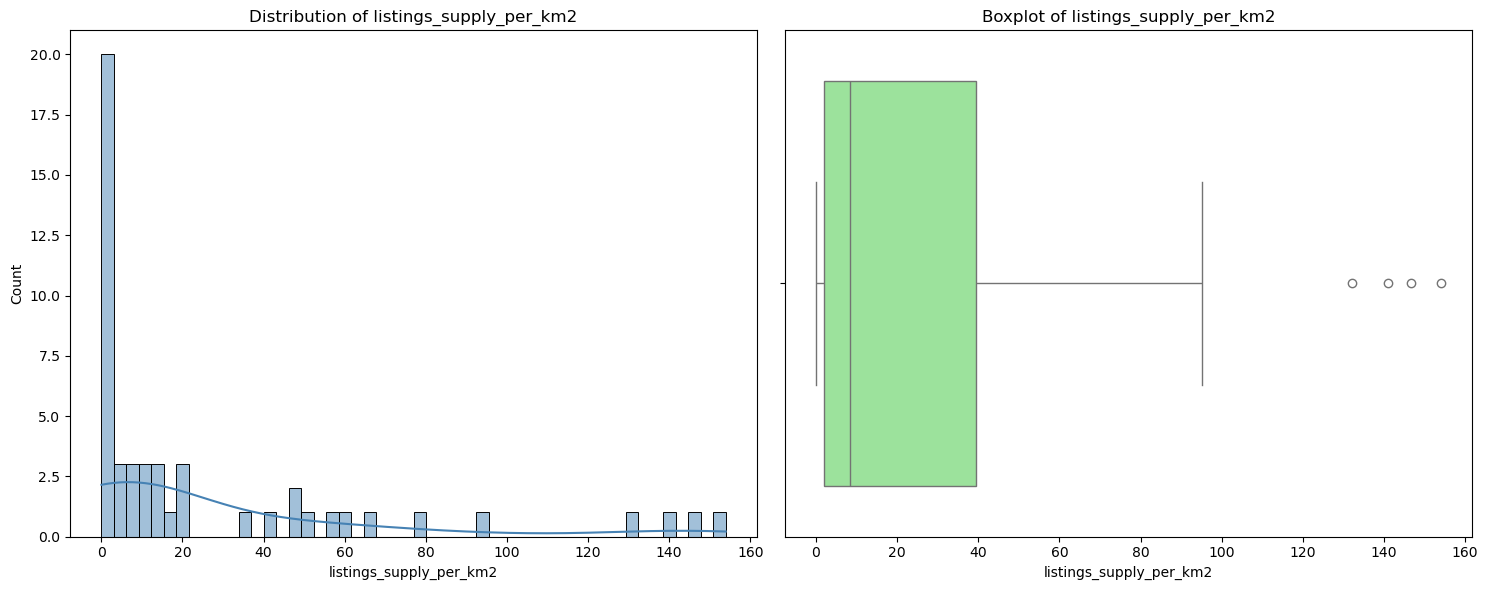

In [128]:
col = 'listings_supply_per_km2'
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Histogram
sns.histplot(neighbourhood_df[col], kde=True, bins=50, color='steelblue', ax=axes[0])
axes[0].set_title(f"Distribution of {col}")
axes[0].set_xlabel(col)
axes[0].set_ylabel("Count")

# Boxplot
sns.boxplot(x=neighbourhood_df[col], ax=axes[1], color='lightgreen')
axes[1].set_title(f"Boxplot of {col}")
axes[1].set_xlabel(col)

plt.tight_layout()
plt.show()

## Add GeoJSON for Visualization

In [129]:
import geopandas as gpd

# Load the GeoJSON neighborhood file
geo = gpd.read_file("neighbourhoods.geojson")

# Merge price data into GeoJSON
geo_neighbourhood_merged = geo.merge(neighbourhood_df, on='neighbourhood', how='left').drop(columns='neighbourhood_group')

geo_neighbourhood_merged.head()

,neighbourhood,geometry,listings_count,demand_median,demand_sum,price_median,price_mean,price_std,price_q25,price_q75,availability365_median,area_in_km2,listings_supply_per_km2
0,Bang Phlat,"MULTIPOLYGON (((100.52 13.8, 100.52 13.799, 10...",183,0.416854,83.295097,900.0,1595.617486,2119.854180,632.0,1600.00,287.0,11.360,16.109155
1,Huai Khwang,"MULTIPOLYGON (((100.59 13.803, 100.59 13.803, ...",910,0.454131,457.432038,1375.0,2009.363736,2039.775618,900.0,2234.75,251.5,15.033,60.533493
2,Wang Thong Lang,"MULTIPOLYGON (((100.61 13.795, 100.61 13.795, ...",87,0.388764,32.938052,800.0,1522.781609,1618.993769,575.0,1900.00,271.0,19.265,4.515962
3,Thawi Watthana,"MULTIPOLYGON (((100.4 13.802, 100.4 13.802, 10...",11,0.370062,3.655742,1500.0,1701.636364,1494.921220,800.0,1800.00,256.0,50.219,0.219041
4,Lat Krabang,"MULTIPOLYGON (((100.8 13.794, 100.8 13.794, 10...",138,0.416578,62.408206,990.0,1329.746377,1328.386162,650.0,1494.50,353.5,123.859,1.114170


In [130]:
geo_neighbourhood_merged.to_file("Bangkok Neighbourhood with Geo Data.geojson", driver='GeoJSON')